# Social Media Shares #

---

Your company has asked you to assist the social media department in analyzing the success of its communication efforts. The goal is to create a tool that predicts the number of shares a social media post will receive based on its content and intended publication time. To do this, a dataset has been collected for you to use in developing the most effective machine learning solution.

---

- Valerio Romano Cadura
- Muhammad Khair Hindawi
- Lorenzo Mainetti

### **Loading the Modules and applying some styling**

In [26]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Applying some styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# Removing warnings
import warnings

warnings.filterwarnings('ignore')

### **Loading the dataset**  ###

In [27]:
data = pd.read_csv('social_media_shares.csv')

## Explanatory data analysis (EDA) with visualization ##


##### **Looking at the first and last 5 rows of the dataset and extracting useful info about the structure**

`As we can see from the below returned result, we have 59 columns and 39644 rows`

In [28]:
pd.set_option('display.max_columns', None)

data.head()

tokens_title  tokens_content  unique_tokens  non_stop_words  \
0            12             219       0.663594             1.0   
1             9             255       0.604743             1.0   
2             9             211       0.575130             1.0   
3             9             531       0.503788             1.0   
4            13            1072       0.415646             1.0   

   non_stop_unique_tokens  hrefs  self_refs  imgs  videos  token_length  \
0                0.815385      4          2     1       0      4.680365   
1                0.791946      3          1     1       0      4.913725   
2                0.663866      3          1     1       0      4.393365   
3                0.665635      9          0     1       0      4.404896   
4                0.540890     19         19    20       0      4.682836   

   keywords  lifestyle  entertainment  bus  socmed  tech  world  kw_min_min  \
0         5          0              1    0       0     0      0           0   
1         4          0              0    1       0     0      0           0   
2         6          0              0    1       0     0      0           0   
3         7          0              1    0       0     0      0           0   
4         7          0              0    0       0     1      0           0   

   kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  \
0         0.0         0.0           0           0         0.0         0.0   
1         0.0         0.0           0           0         0.0         0.0   
2         0.0         0.0           0           0         0.0         0.0   
3         0.0         0.0           0           0         0.0         0.0   
4         0.0         0.0           0           0         0.0         0.0   

   kw_max_avg  kw_avg_avg  self_reference_min_shares  \
0         0.0         0.0                      496.0   
1         0.0         0.0                        0.0   
2         0.0         0.0                      918.0   
3         0.0         0.0                        0.0   
4         0.0         0.0                      545.0   

   self_reference_max_shares  self_reference_avg_shares  monday  tuesday  \
0                      496.0                 496.000000       1        0   
1                        0.0                   0.000000       1        0   
2                      918.0                 918.000000       1        0   
3                        0.0                   0.000000       1        0   
4                    16000.0                3151.157895       1        0   

   wednesday  thursday  friday  saturday  sunday  is_weekend    LDA_00  \
0          0         0       0         0       0           0  0.500331   
1          0         0       0         0       0           0  0.799756   
2          0         0       0         0       0           0  0.217792   
3          0         0       0         0       0           0  0.028573   
4          0         0       0         0       0           0  0.028633   

     LDA_01    LDA_02    LDA_03    LDA_04  subjectivity  sentiment_polarity  \
0  0.378279  0.040005  0.041263  0.040123      0.521617            0.092562   
1  0.050047  0.050096  0.050101  0.050001      0.341246            0.148948   
2  0.033334  0.033351  0.033334  0.682188      0.702222            0.323333   
3  0.419300  0.494651  0.028905  0.028572      0.429850            0.100705   
4  0.028794  0.028575  0.028572  0.885427      0.513502            0.281003   

   global_rate_positive_words  global_rate_negative_words  \
0                    0.045662                    0.013699   
1                    0.043137                    0.015686   
2                    0.056872                    0.009479   
3                    0.041431                    0.020716   
4                    0.074627                    0.012127   

   rate_positive_words  rate_negative_words  avg_positive_polarity  \
0             0.769231             0.230769               0.378636

In [29]:
data.tail()

tokens_title  tokens_content  unique_tokens  non_stop_words  \
39639            11             346       0.529052             1.0   
39640            12             328       0.696296             1.0   
39641            10             442       0.516355             1.0   
39642             6             682       0.539493             1.0   
39643            10             157       0.701987             1.0   

       non_stop_unique_tokens  hrefs  self_refs  imgs  videos  token_length  \
39639                0.684783      9          7     1       1      4.523121   
39640                0.885057      9          7     3      48      4.405488   
39641                0.644128     24          1    12       1      5.076923   
39642                0.692661     10          1     1       0      4.975073   
39643                0.846154      1          1     0       2      4.471338   

       keywords  lifestyle  entertainment  bus  socmed  tech  world  \
39639         8          0              0    0       0     1      0   
39640         7          0              0    0       1     0      0   
39641         8          0              0    0       0     0      0   
39642         5          0              0    0       0     0      1   
39643         4          0              1    0       0     0      0   

       kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  \
39639          -1       671.0     173.125       26900      843300   
39640          -1       616.0     184.000        6500      843300   
39641          -1       691.0     168.250        6200      843300   
39642          -1         0.0      -1.000           0      843300   
39643          -1        97.0      23.500      205600      843300   

          kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
39639  374962.500000  2514.742857  4004.342857  3031.115764   
39640  192985.714286  1664.267857  5470.168651  3411.660830   
39641  295850.000000  1753.882353  6880.687034  4206.439195   
39642  254600.000000     0.000000  3384.316871  1777.895883   
39643  366200.000000  3035.080555  3613.512953  3296.909481   

       self_reference_min_shares  self_reference_max_shares  \
39639                    11400.0                    48000.0   
39640                     2100.0                     2100.0   
39641                     1400.0                     1400.0   
39642                      452.0                      452.0   
39643                     2100.0                     2100.0   

       self_reference_avg_shares  monday  tuesday  wednesday  thursday  \
39639               37033.333333       0        0          1         0   
39640                2100.000000       0        0          1         0   
39641                1400.000000       0        0          1         0   
39642                 452.000000       0        0          1         0   
39643                2100.000000       0        0          1         0   

       friday  saturday  sunday  is_weekend    LDA_00    LDA_01    LDA_02  \
39639       0         0       0           0  0.025038  0.025001  0.151701   
39640       0         0       0           0  0.029349  0.028575  0.231866   
39641       0         0       0           0  0.159004  0.025025  0.025207   
39642       0         0       0           0  0.040004  0.040003  0.839987   
39643       0         0       0           0  0.050001  0.799339  0.050000   

         LDA_03    LDA_04  subjectivity  sentiment_polarity  \
39639  0.025000  0.773260      0.482679            0.141964   
39640  0.681635  0.028575      0.564374            0.194249   
39641  0.643794  0.146970      0.510296            0.024609   
39642  0.040002  0.040004      0.358578           -0.008066   
39643  0.050659  0.050001      0.517893            0.104892   

       global_rate_positive_words  global_rate_negative_words  \
39639                    0.037572                    0.014451   
39640                    0.039634                    0.009146   
39641                    0.03

In [30]:
print(f'number of columns: {len(data.columns)}')

number of columns: 59


In [31]:
print(f'number of rows: {len(data.index)}')

number of rows: 39644


In [32]:
data.dtypes

tokens_title                      int64
tokens_content                    int64
unique_tokens                   float64
non_stop_words                  float64
non_stop_unique_tokens          float64
hrefs                             int64
self_refs                         int64
imgs                              int64
videos                            int64
token_length                    float64
keywords                          int64
lifestyle                         int64
entertainment                     int64
bus                               int64
socmed                            int64
tech                              int64
world                             int64
kw_min_min                        int64
kw_max_min                      float64
kw_avg_min                      float64
kw_min_max                        int64
kw_max_max                        int64
kw_avg_max                      float64
kw_min_avg                      float64
kw_max_avg                      float64


### Descriptive Information about the dataset ####

In [33]:
data.describe()

tokens_title  tokens_content  unique_tokens  non_stop_words  \
count  39644.000000    39644.000000   39644.000000    39644.000000   
mean      10.398749      546.514731       0.548216        0.996469   
std        2.114037      471.107508       3.520708        5.231231   
min        2.000000        0.000000       0.000000        0.000000   
25%        9.000000      246.000000       0.470870        1.000000   
50%       10.000000      409.000000       0.539226        1.000000   
75%       12.000000      716.000000       0.608696        1.000000   
max       23.000000     8474.000000     701.000000     1042.000000   

       non_stop_unique_tokens         hrefs     self_refs          imgs  \
count            39644.000000  39644.000000  39644.000000  39644.000000   
mean                 0.689175     10.883690      3.293638      4.544143   
std                  3.264816     11.332017      3.855141      8.309434   
min                  0.000000      0.000000      0.000000      0.000000   
25%                  0.625739      4.000000      1.000000      1.000000   
50%                  0.690476      8.000000      3.000000      1.000000   
75%                  0.754630     14.000000      4.000000      4.000000   
max                650.000000    304.000000    116.000000    128.000000   

             videos  token_length      keywords     lifestyle  entertainment  \
count  39644.000000  39644.000000  39644.000000  39644.000000   39644.000000   
mean       1.249874      4.548239      7.223767      0.052946       0.178009   
std        4.107855      0.844406      1.909130      0.223929       0.382525   
min        0.000000      0.000000      1.000000      0.000000       0.000000   
25%        0.000000      4.478404      6.000000      0.000000       0.000000   
50%        0.000000      4.664082      7.000000      0.000000       0.000000   
75%        1.000000      4.854839      9.000000      0.000000       0.000000   
max       91.000000      8.041534     10.000000      1.000000       1.000000   

                bus        socmed          tech         world    kw_min_min  \
count  39644.000000  39644.000000  39644.000000  39644.000000  39644.000000   
mean       0.157855      0.058597      0.185299      0.212567     26.106801   
std        0.364610      0.234871      0.388545      0.409129     69.633215   
min        0.000000      0.000000      0.000000      0.000000     -1.000000   
25%        0.000000      0.000000      0.000000      0.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000     -1.000000   
75%        0.000000      0.000000      0.000000      0.000000      4.000000   
max        1.000000      1.000000      1.000000      1.000000    377.000000   

          kw_max_min    kw_avg_min     kw_min_max     kw_max_max  \
count   39644.000000  39644.000000   39644.000000   39644.000000   
mean     1153.951682    312.366967   13612.354102  752324.066694   
std      3857.990877    620.783887   57986.029357  214502.129573   
min         0.000000     -1.000000       0.000000       0.000000   
25%       445.000000    141.750000       0.000000  843300.000000   
50%       660.000000    235.500000    1400.000000  843300.000000   
75%      1000.000000    357.000000    7900.000000  843300.000000   
max    298400.000000  42827.857143  843300.000000  843300.000000   

          kw_avg_max    kw_min_avg     kw_max_avg    kw_avg_avg  \
count   39644.000000  39644.000000   39644.000000  39644.000000   
mean   259281.938083   1117.146610    5657.211151   3135.858639   
std    135102.247285   1137.456951    6098.871957   1318.150397   
min         0.000000     -1.000000       0.000000      0.000000   
25%    172846.875000      0.000000    3562.101631   2382.448566   
50%    244572.222223   1023.635611    4355.688836   2870.074878   
75%    330980.000000   2056.781032    6019.953968   3600.229564   
max    843300.000000   3613.039819  298400.000000  43567.659946   

       self_reference_min_shares  self_reference_m

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tokens_title                  39644 non-null  int64  
 1   tokens_content                39644 non-null  int64  
 2   unique_tokens                 39644 non-null  float64
 3   non_stop_words                39644 non-null  float64
 4   non_stop_unique_tokens        39644 non-null  float64
 5   hrefs                         39644 non-null  int64  
 6   self_refs                     39644 non-null  int64  
 7   imgs                          39644 non-null  int64  
 8   videos                        39644 non-null  int64  
 9   token_length                  39644 non-null  float64
 10  keywords                      39644 non-null  int64  
 11  lifestyle                     39644 non-null  int64  
 12  entertainment                 39644 non-null  int64  
 13  b

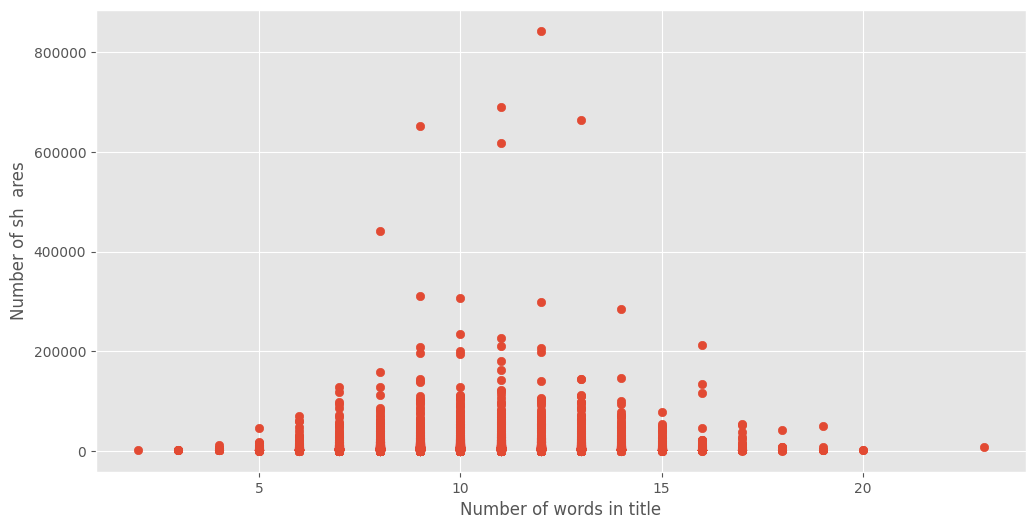

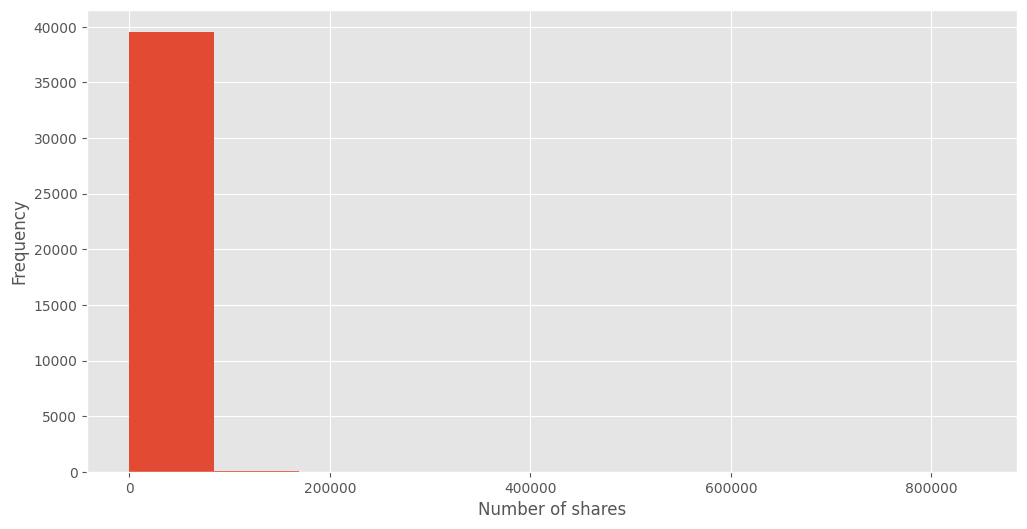

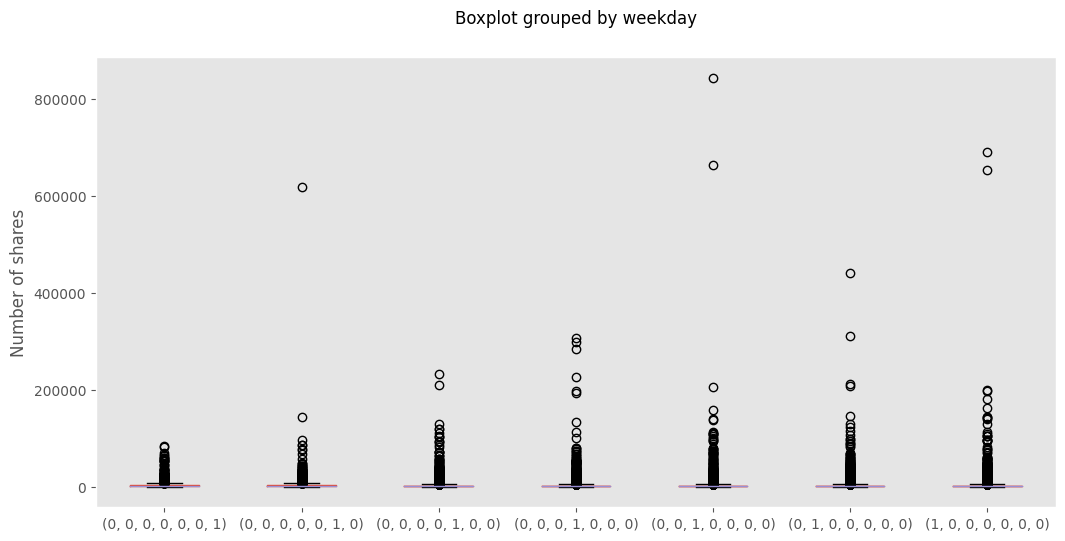

In [35]:
# Scatter plot of tokens_title vs. number of shares
plt.scatter(data["tokens_title"], data["shares"])
plt.xlabel("Number of words in title")
plt.ylabel("Number of sh  ares")
plt.show()
print()

# Histogram of number of shares
plt.hist(data["shares"], bins = 10)
plt.xlabel("Number of shares")
plt.ylabel("Frequency")
plt.show()
print()

# Box plot of number of shares by day of the week
data.boxplot(column="shares", by=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], grid=False);
plt.ylabel("Number of shares")
plt.title('')
plt.suptitle('Boxplot grouped by weekday')
plt.xlabel('');

plt.show()

### Understanding the relationship between the independent variables and the target ###

In [36]:
# obtaining shares correlations with other variables:

shares_correlations = dict(data.corr('spearman'))['shares'].to_frame()

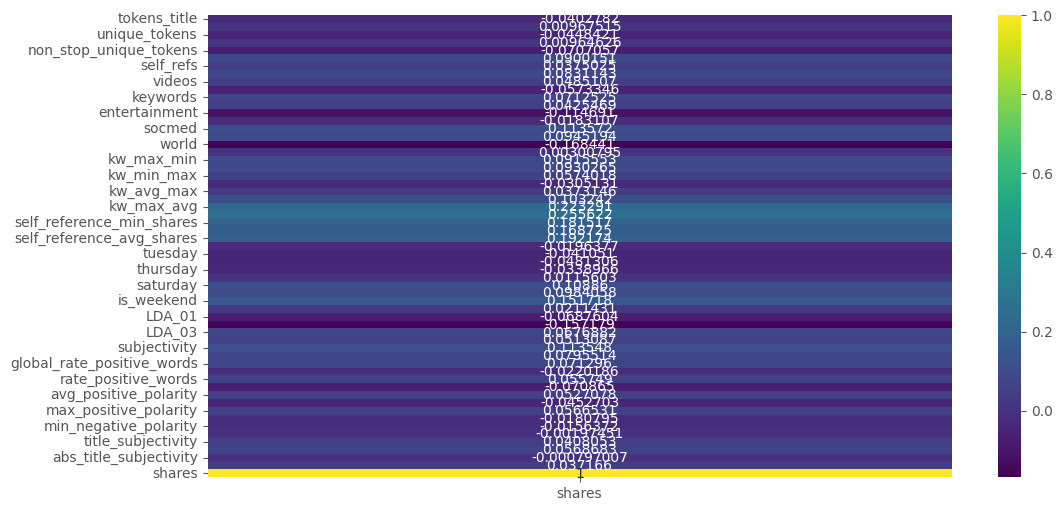

In [37]:
# using a heatmap of the shares correlations
sns.heatmap(shares_correlations, annot = True, fmt = "g", cmap = 'viridis');

### **Removing outliers** ###

<AxesSubplot: >

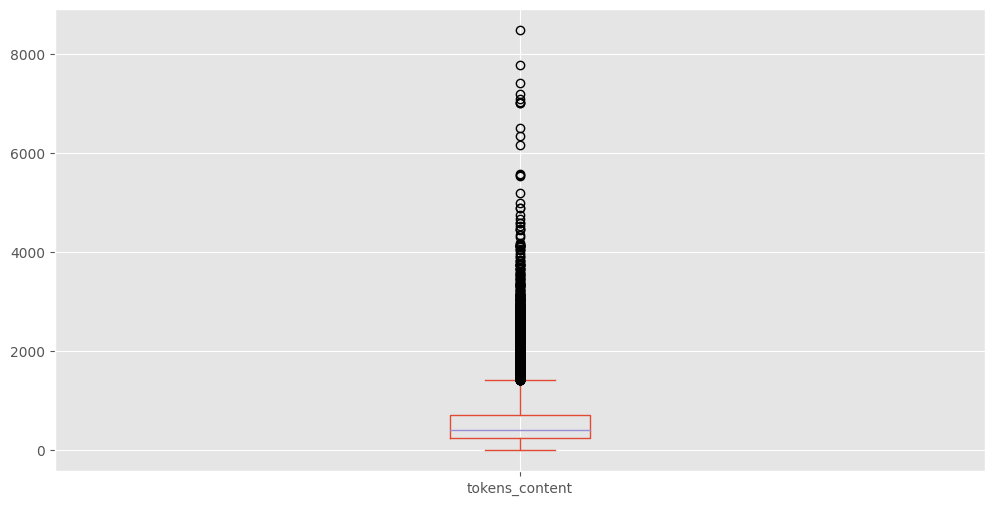

In [38]:
# Taking a good look at outliers for some columns using boxplots

# we can see  here that there are some outliers that will be later removed
data['tokens_content'].plot(kind = 'box')

<AxesSubplot: >

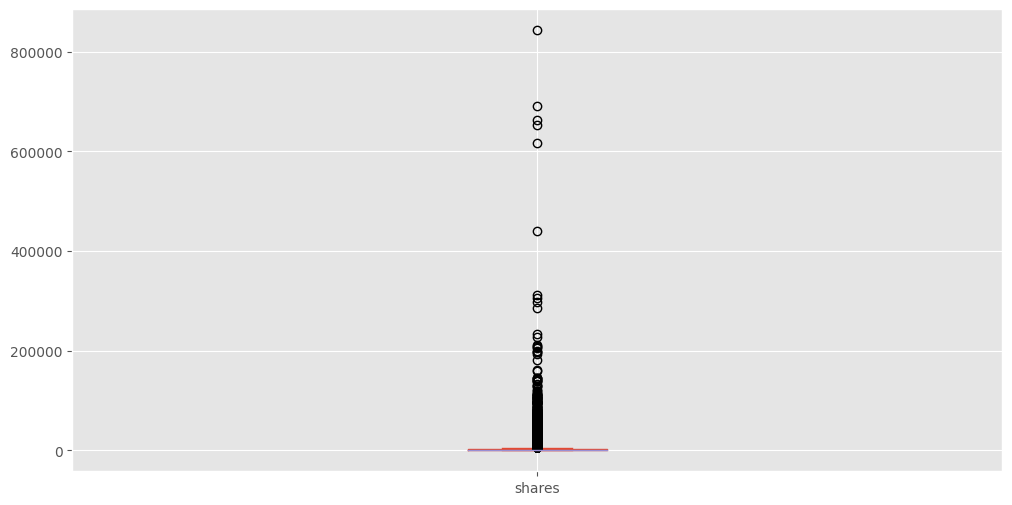

In [39]:
data['shares'].plot(kind = 'box')



---


This function tаkes in a dаta frаme as input and returns a new data frame with the outliers removed.

We first loop through each column in the data frame. If the data type of the column is float64 or int64, we find the 1st and 99th percentile values of the column using the quantile function. Then, we replace all the values in the column that are less than or equal to the 1st percentile with the 1st percentile value and all the values that are greater than or equal to the 99th percentile with the 99th percentile value.

For all other data types, we simply keep the values as they are.



Finally, we return the modified data frame.


---



In [40]:
def remove_outliers(data_frame):  # define function that tаkes in a data frame as input

    for col in data_frame.columns:  # loop through each column in the dаta frame
        
        if (((data_frame[col].dtype) == 'float64') | ((data_frame[col].dtype) == 'int64')):  # if the dаta type of the column is float64 or int64
            percentiles = data_frame[col].quantile([0.01,0.99]).values  # find the 1st and 99th percentile values of the column
            data_frame[col][data_frame[col] <= percentiles[0]] = percentiles[0]  # replace all values less than or equal to the 1st percentile with the 1st percentile value
            data_frame[col][data_frame[col] >= percentiles[1]] = percentiles[1]  # replace all values greater than or equal to the 99th percentile with the 99th percentile value
        else:  # for all other data types
            data_frame[col] = data_frame[col]  # keep the values as they are
    
    return data_frame  # return the modified dаta frame

# our clean dataframe
data_clean = remove_outliers(data)  # call the function with the data frame as input and store the returned data frame in a variable called `data_clean`

In [41]:
data = data_clean.fillna(0)

<AxesSubplot: >

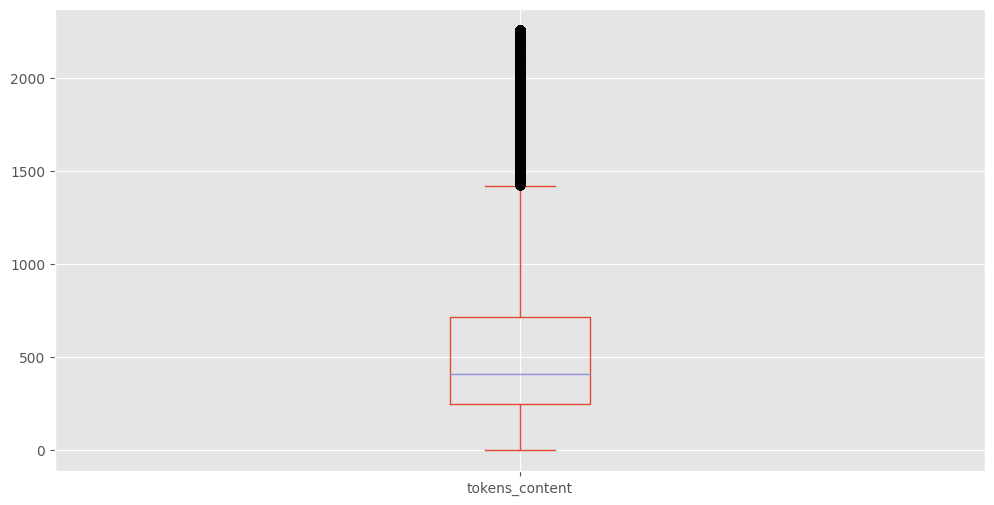

In [42]:
# outliers removed boxplot

data_clean['tokens_content'].plot(kind = 'box')

<AxesSubplot: >

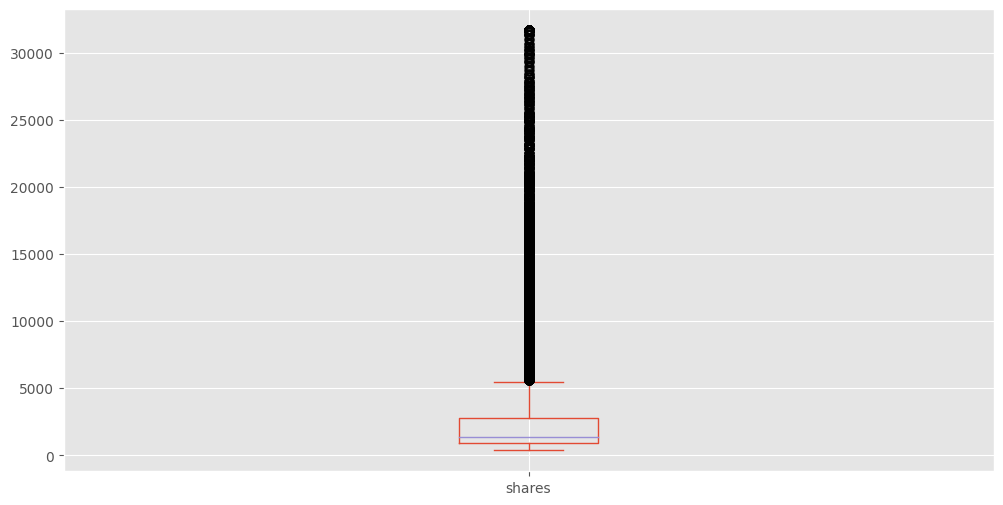

In [43]:
# outliers removed

data_clean['shares'].plot(kind = 'box')

In [44]:
len(data_clean.columns)

59

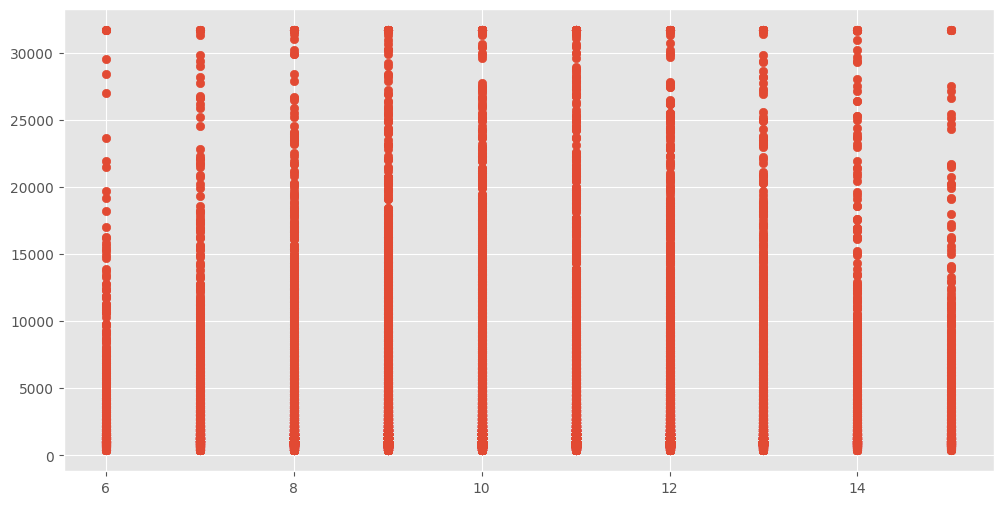

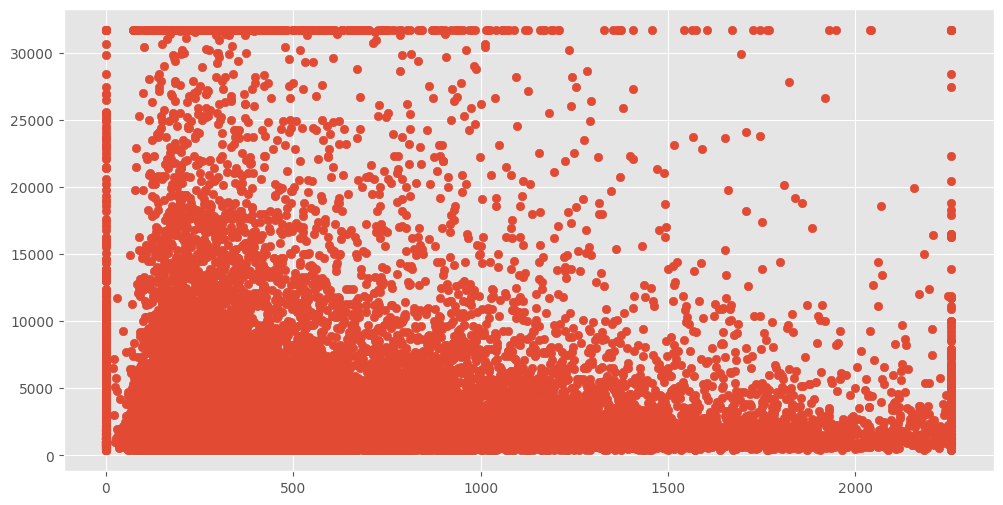

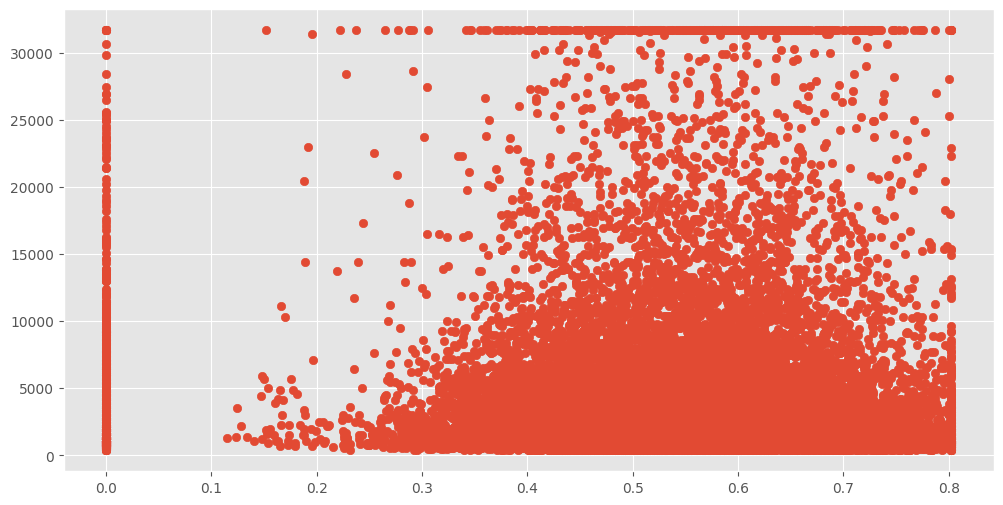

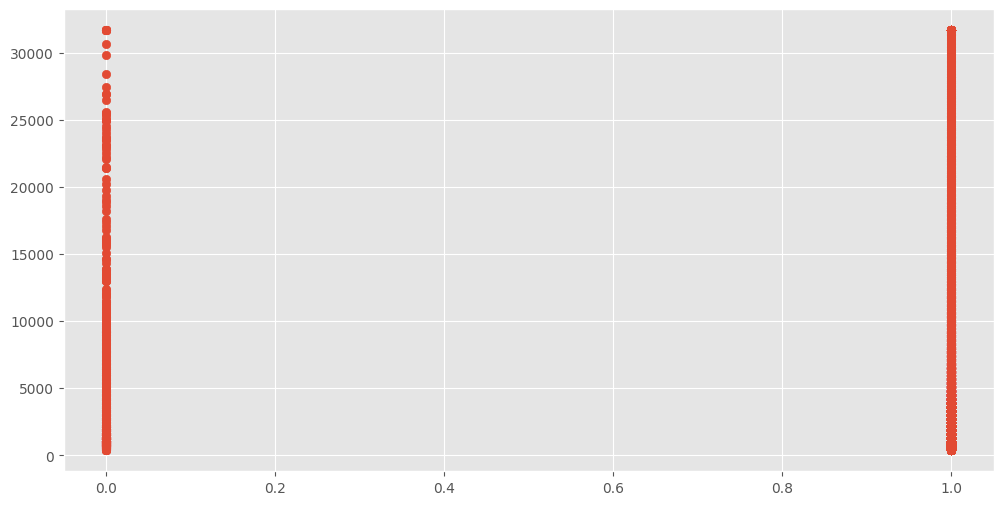

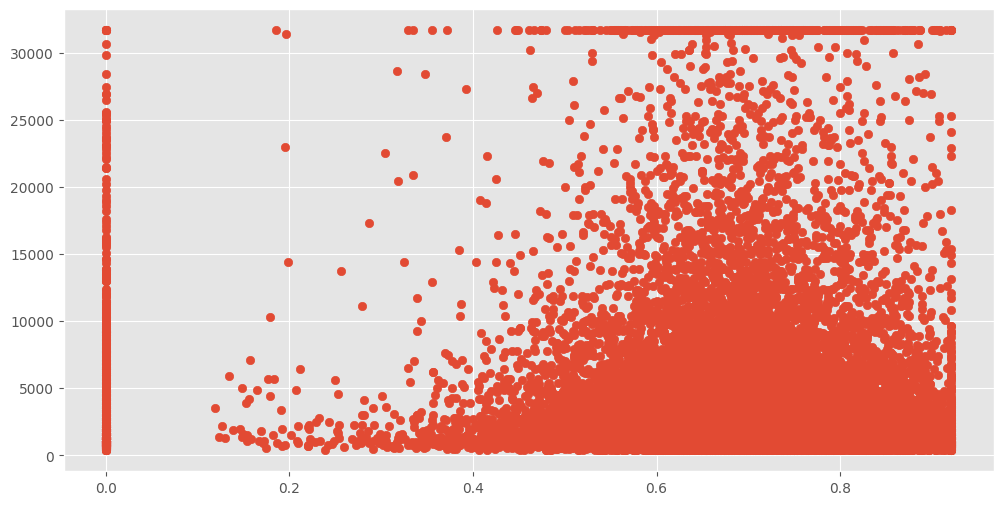

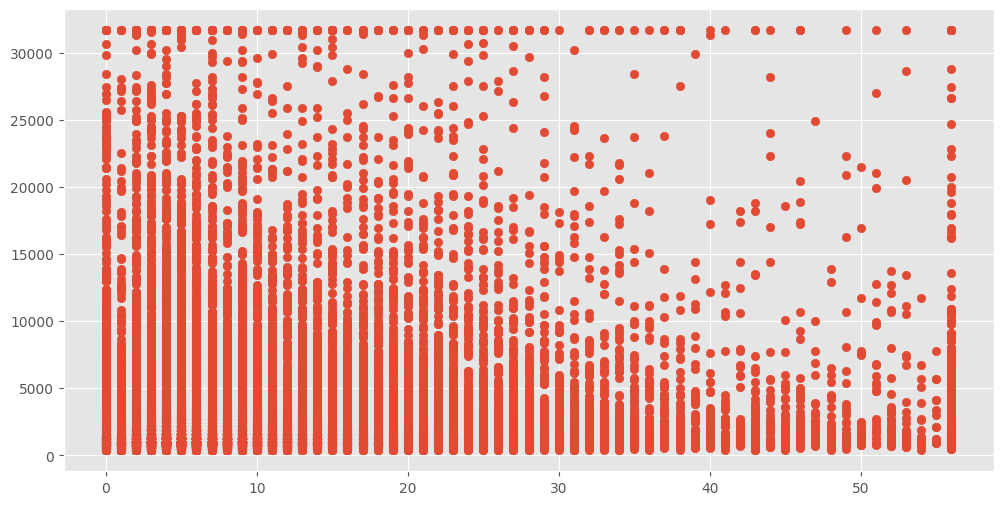

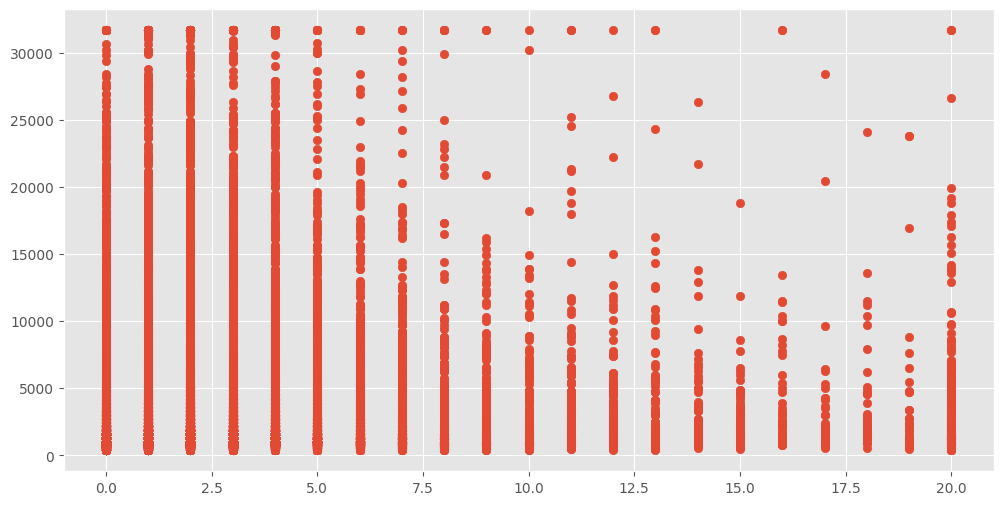

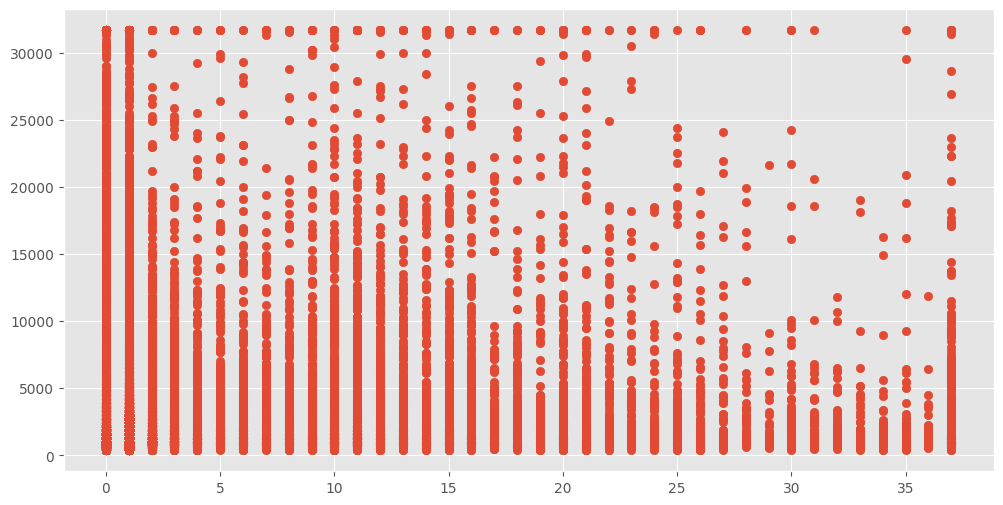

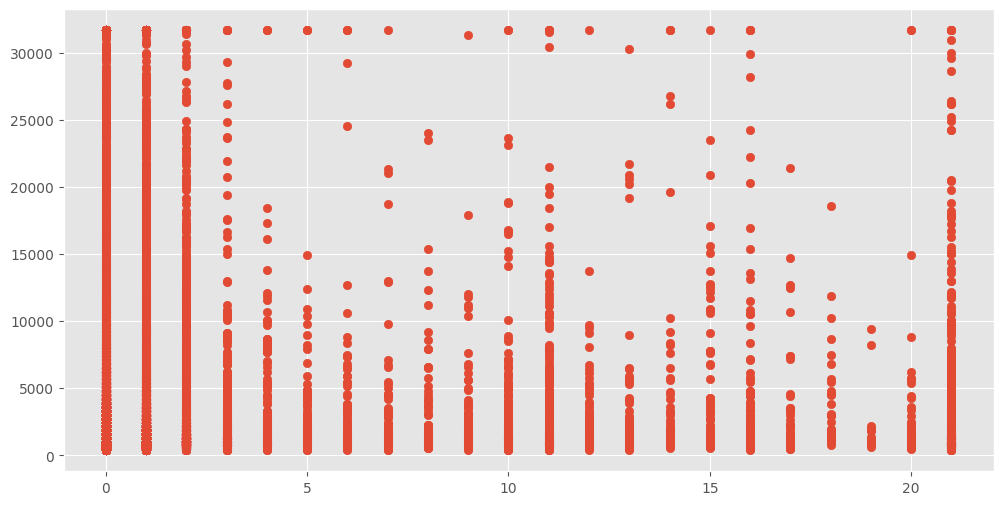

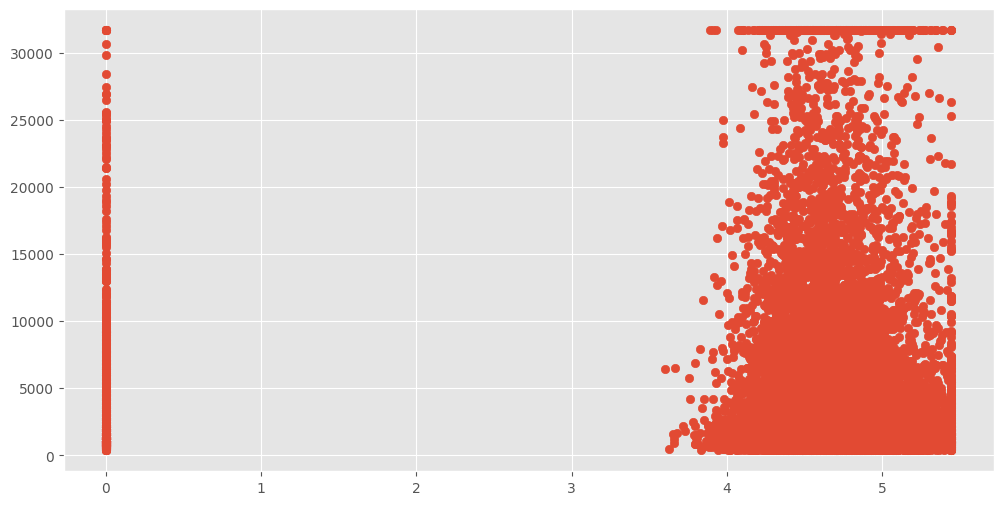

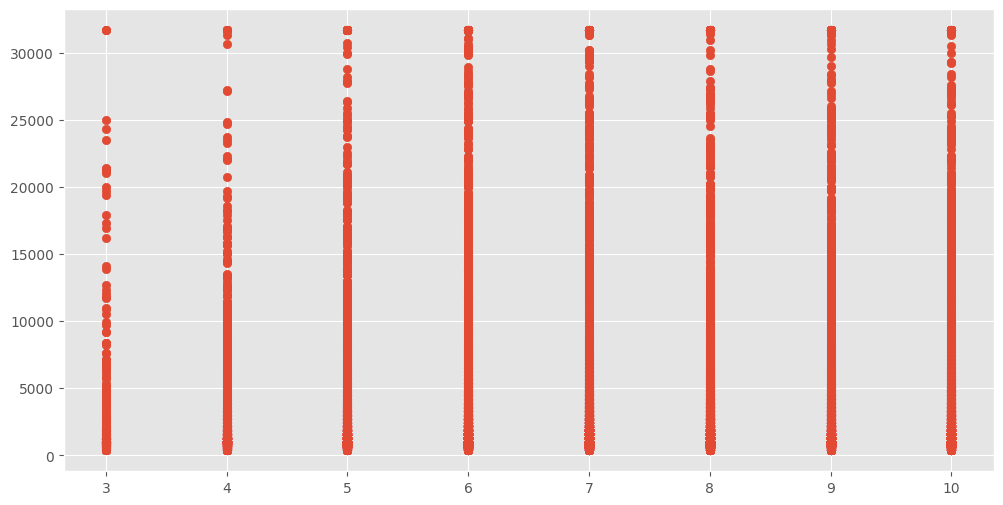

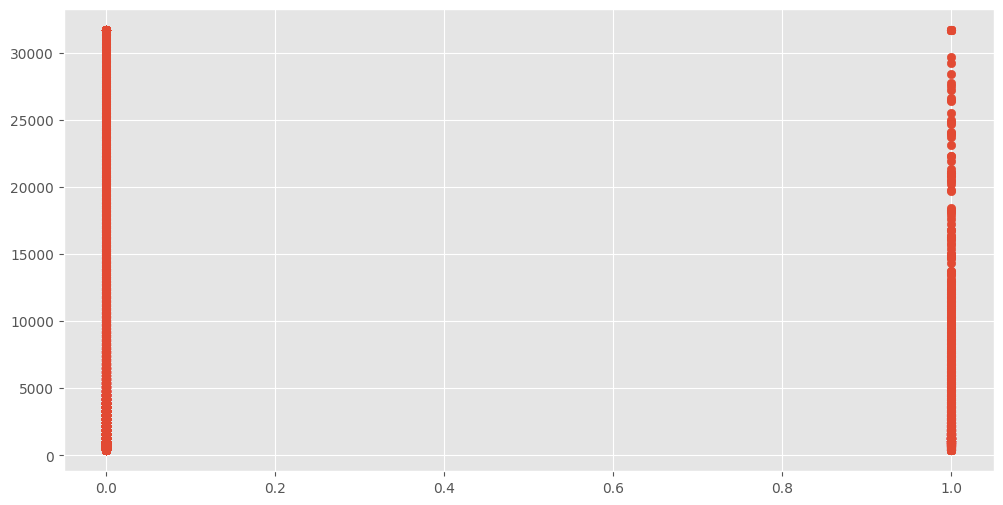

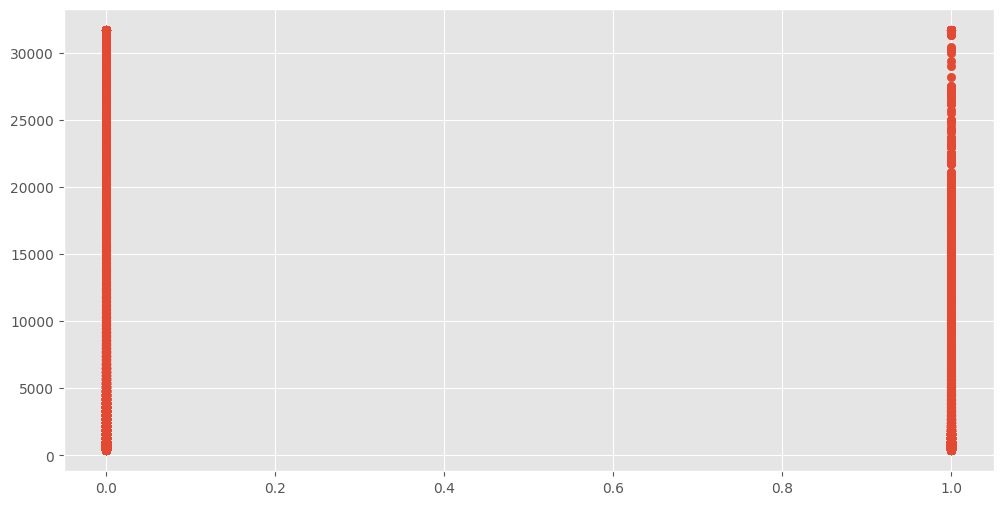

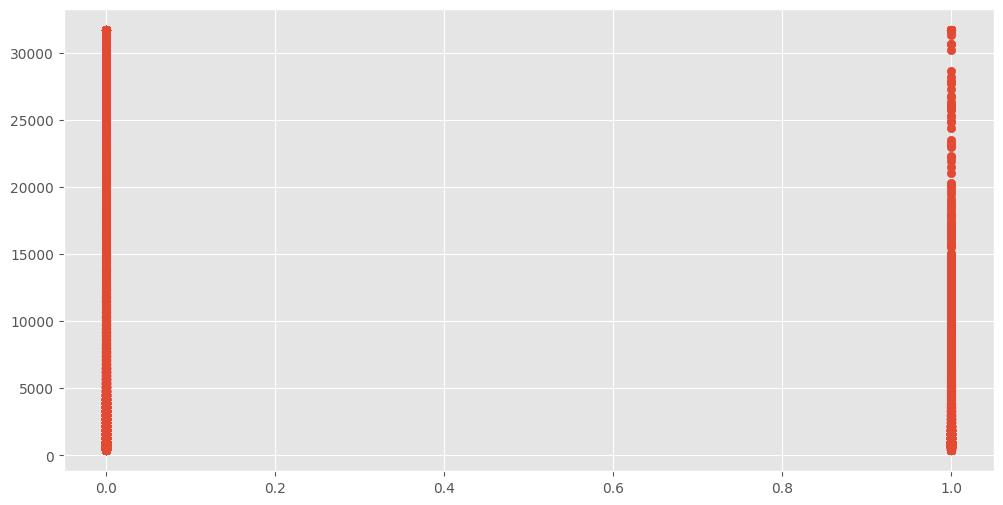

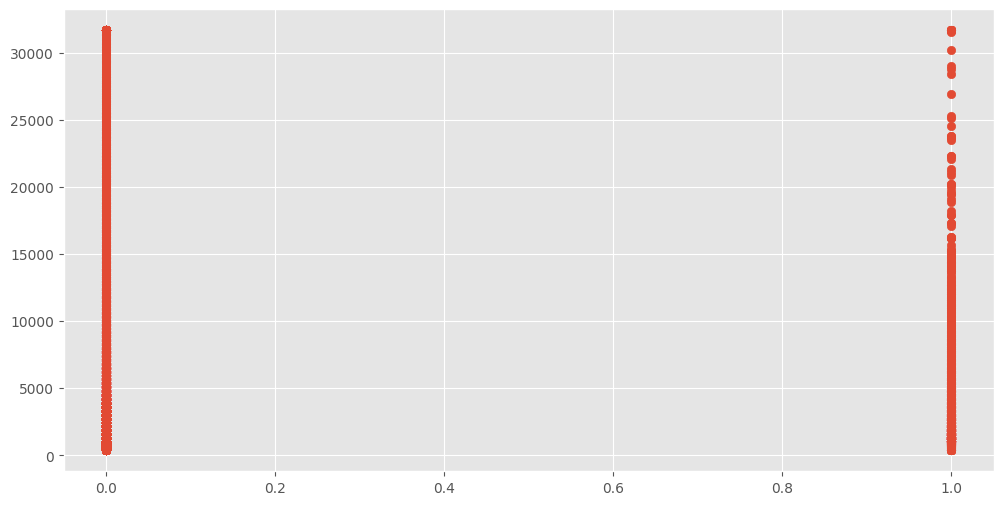

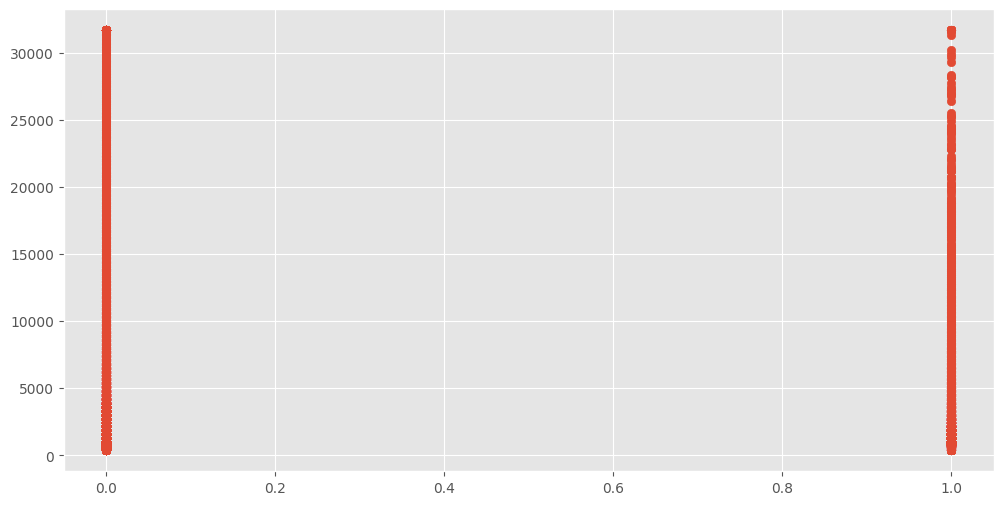

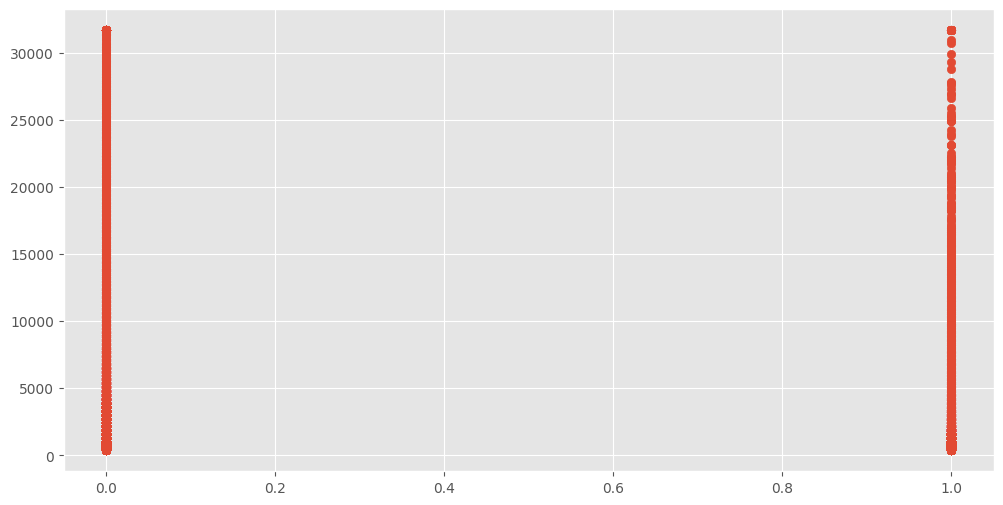

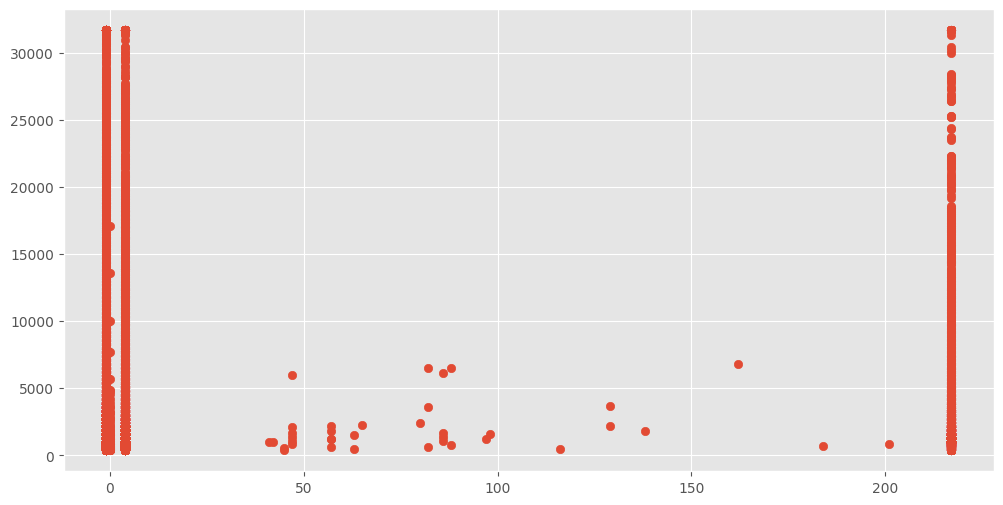

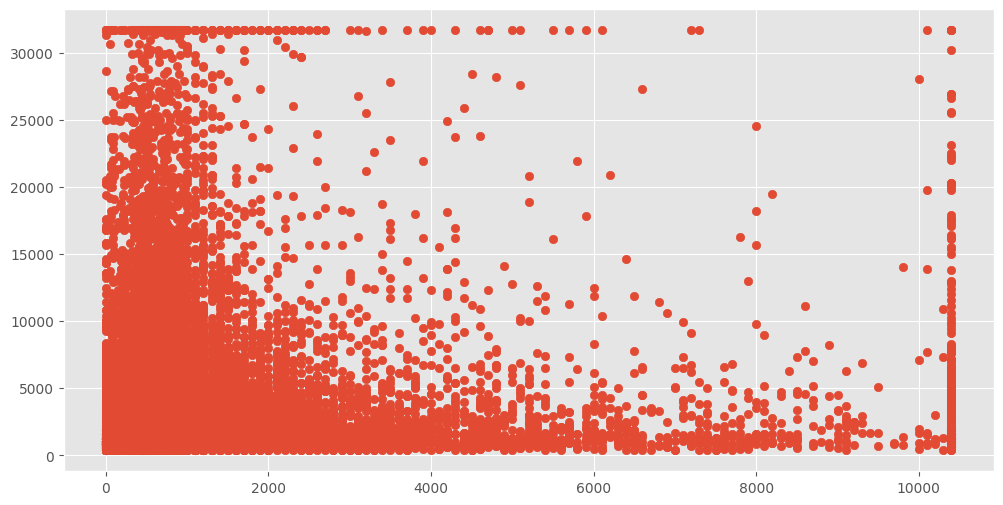

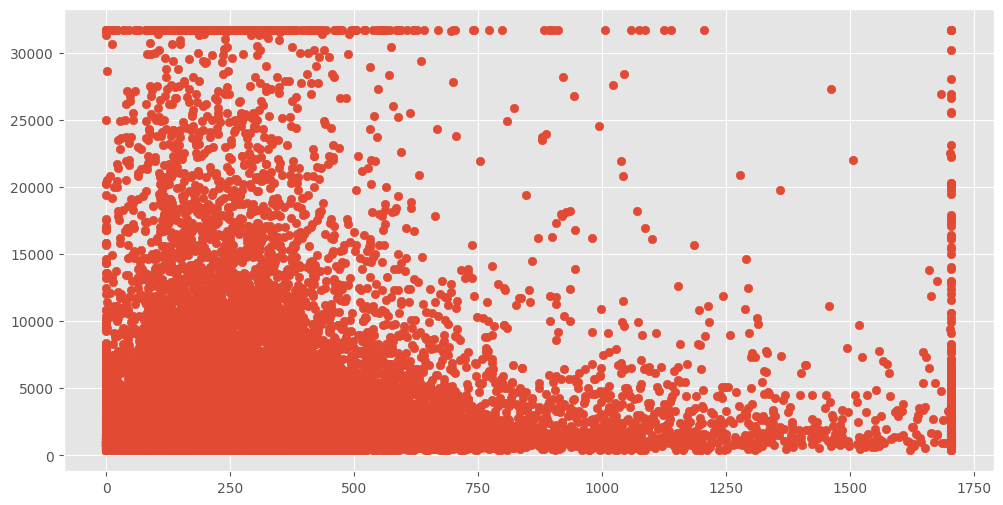

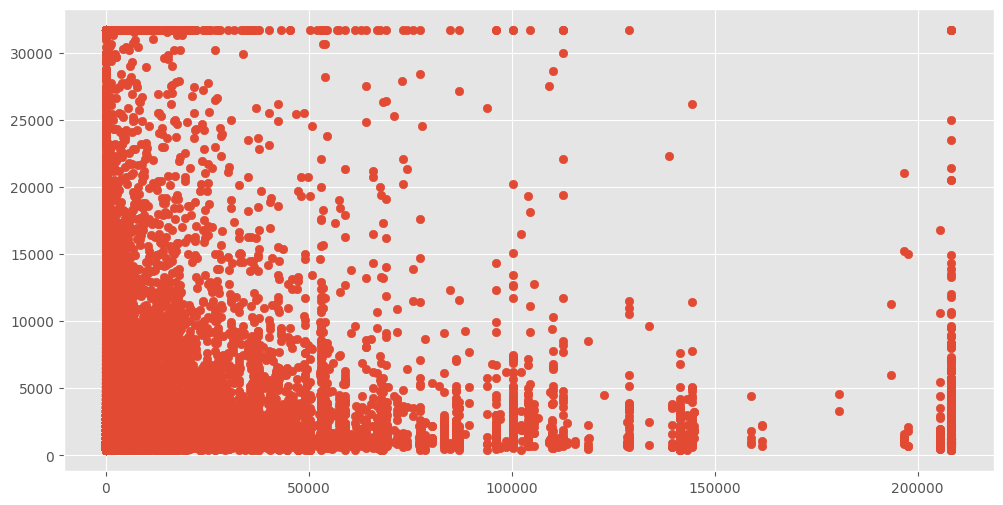

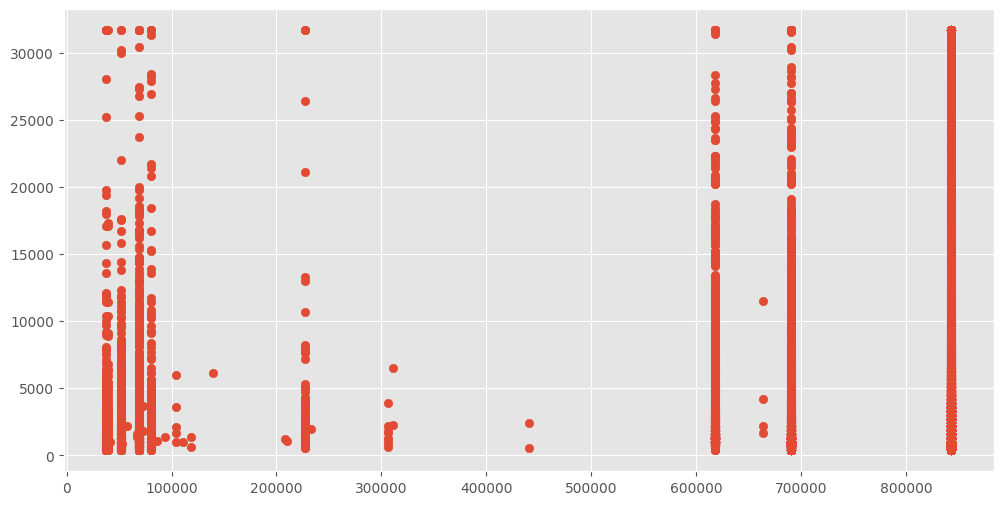

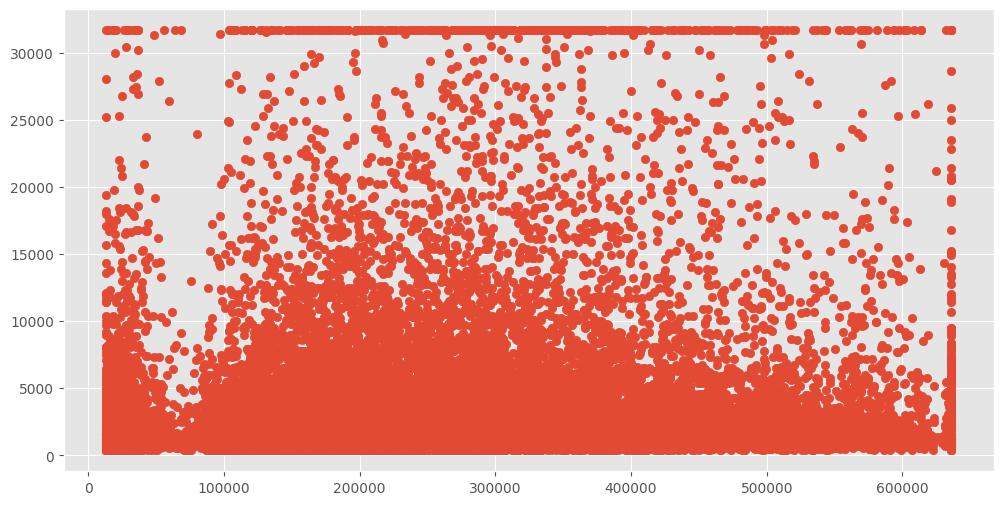

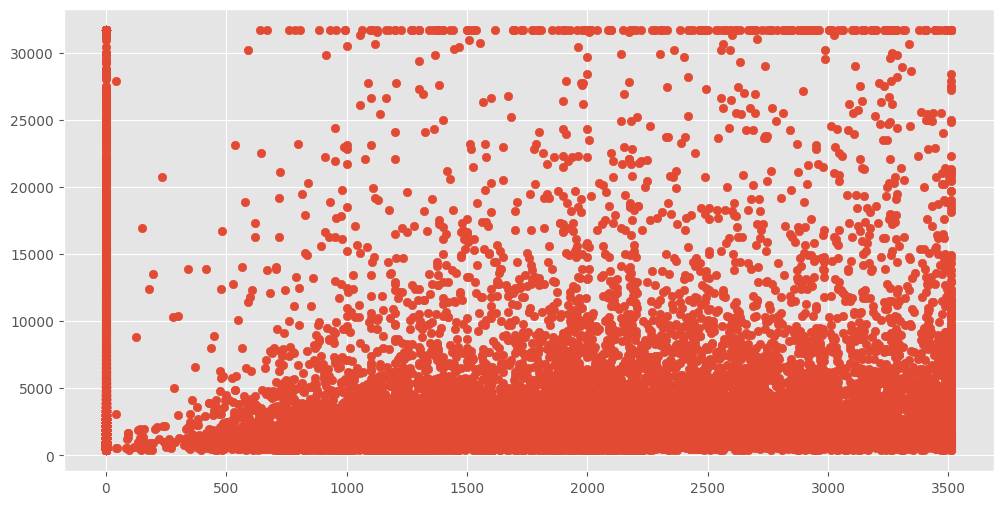

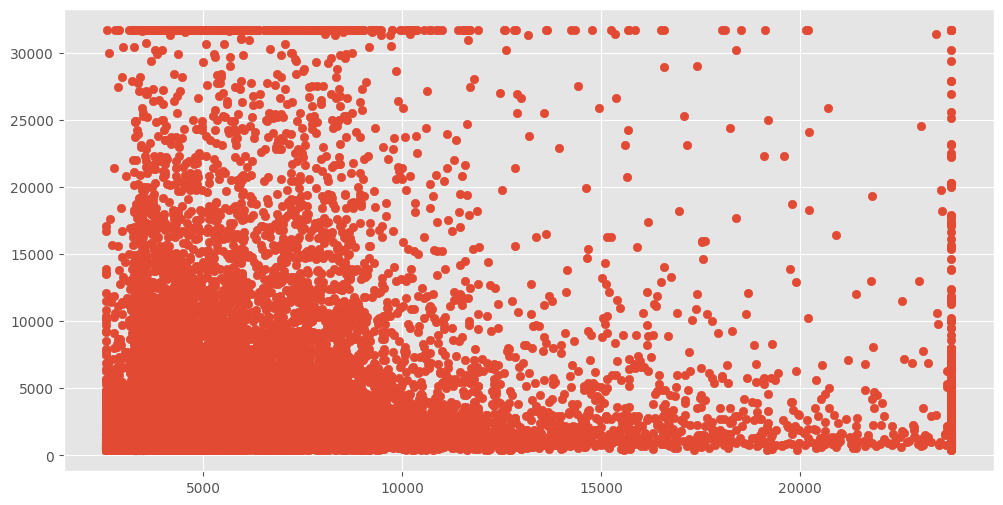

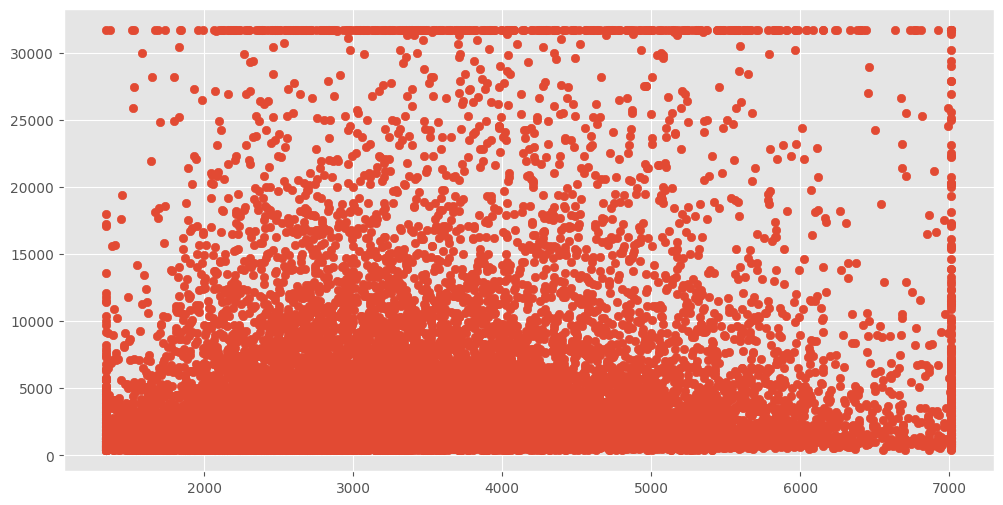

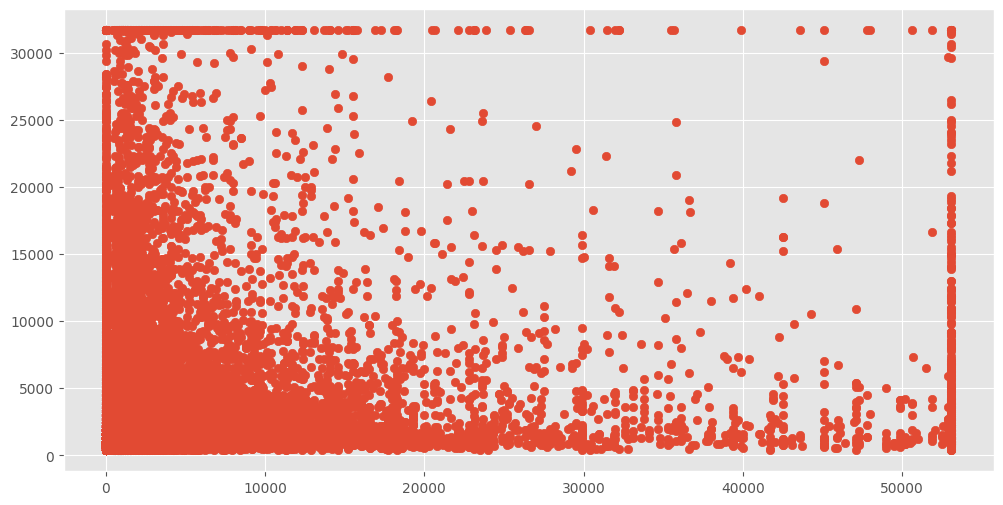

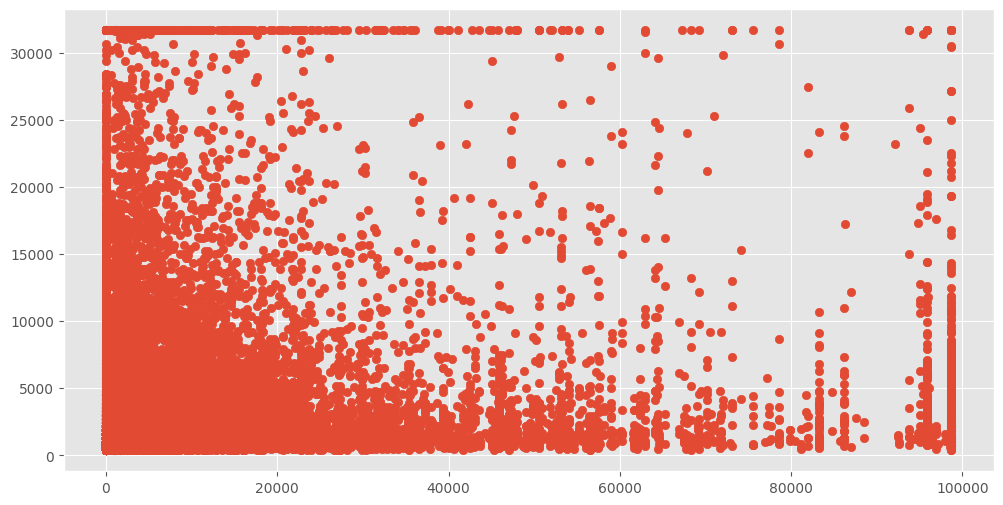

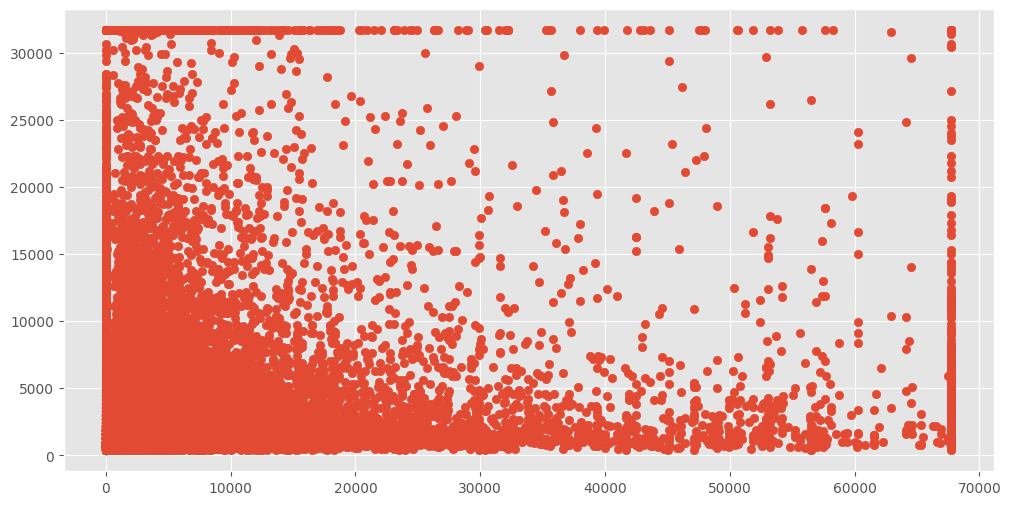

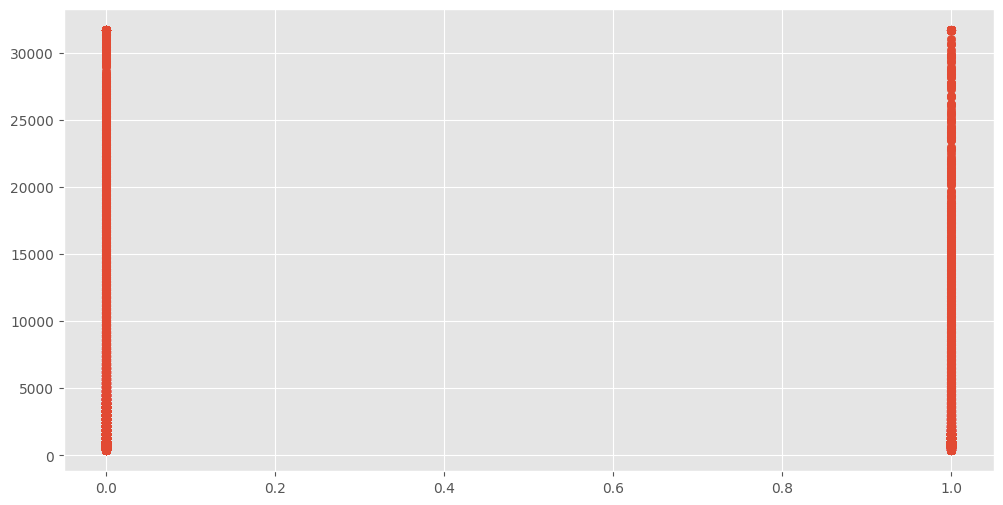

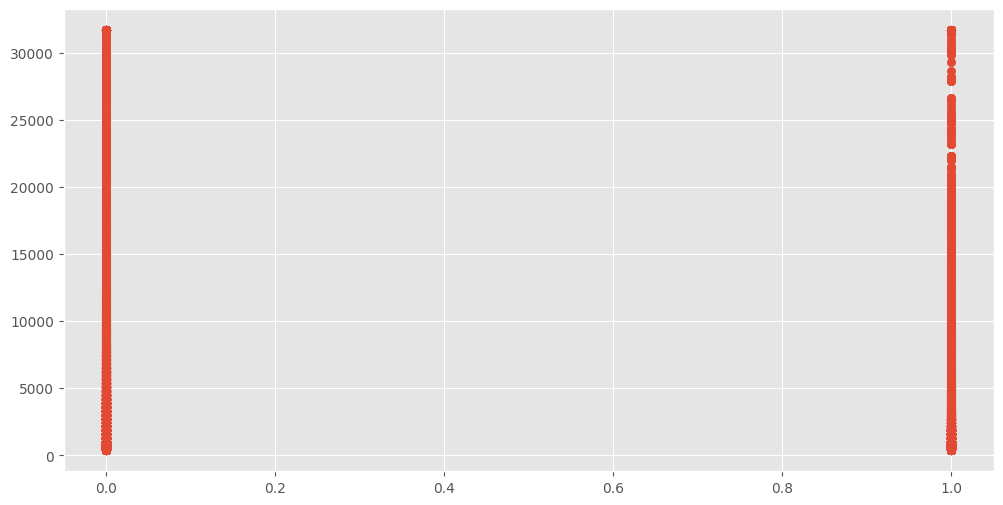

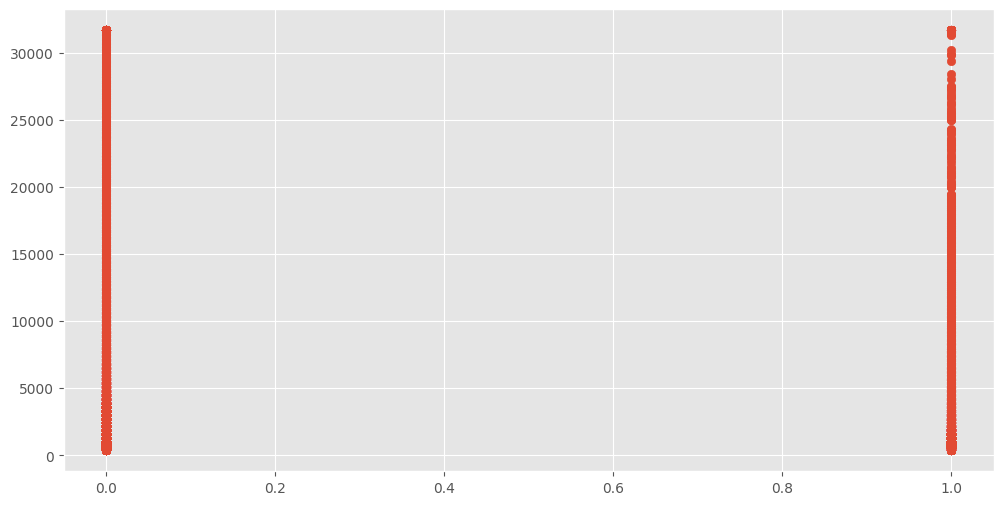

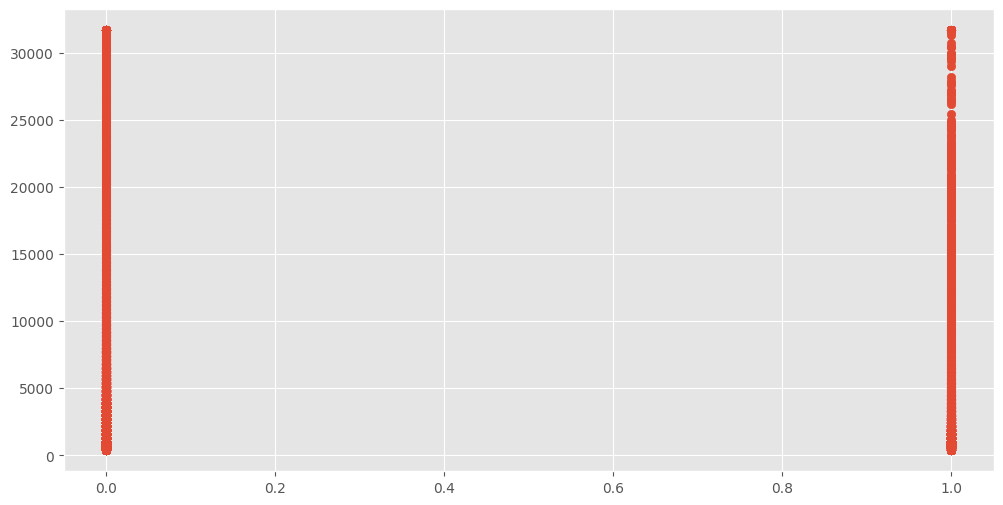

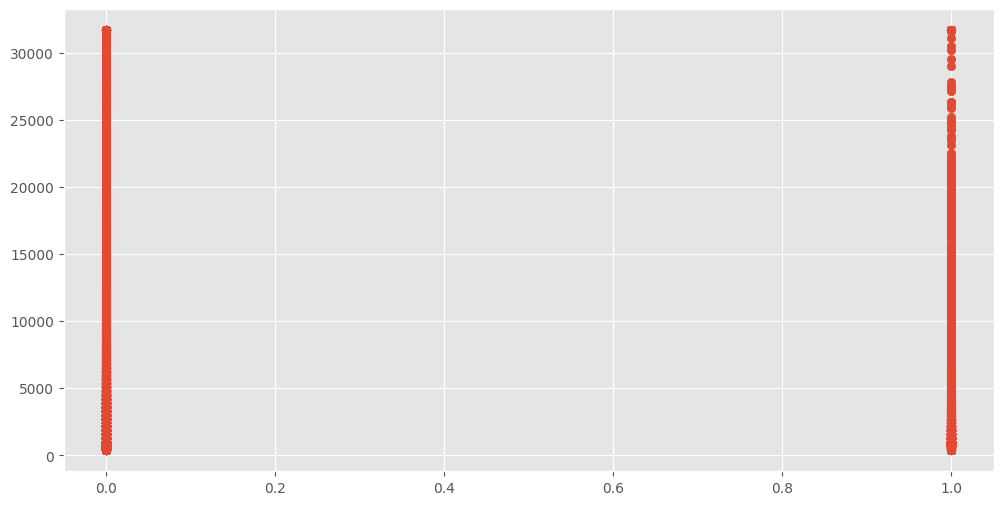

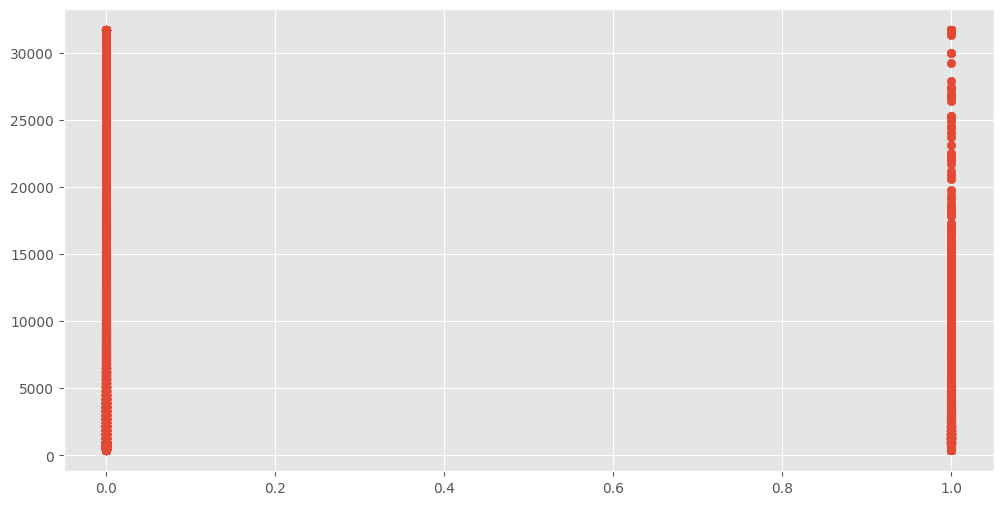

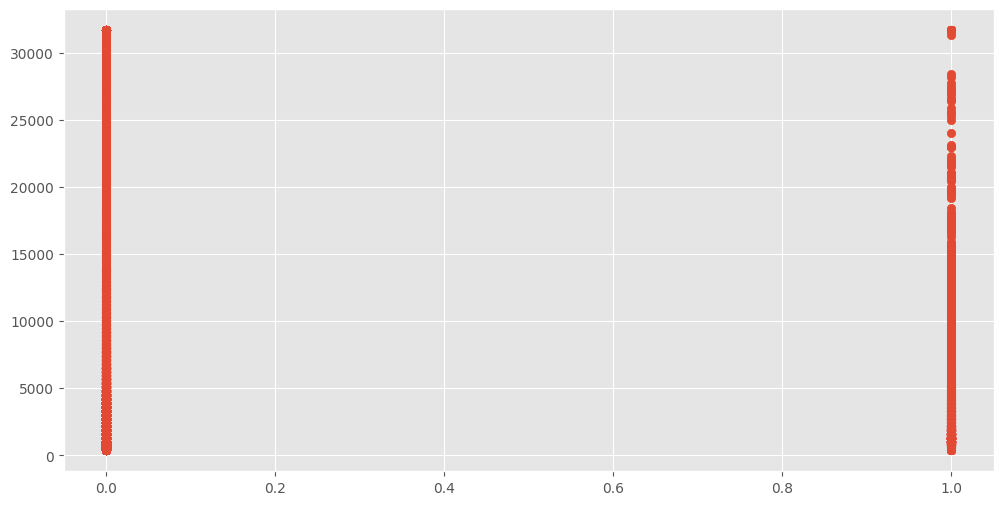

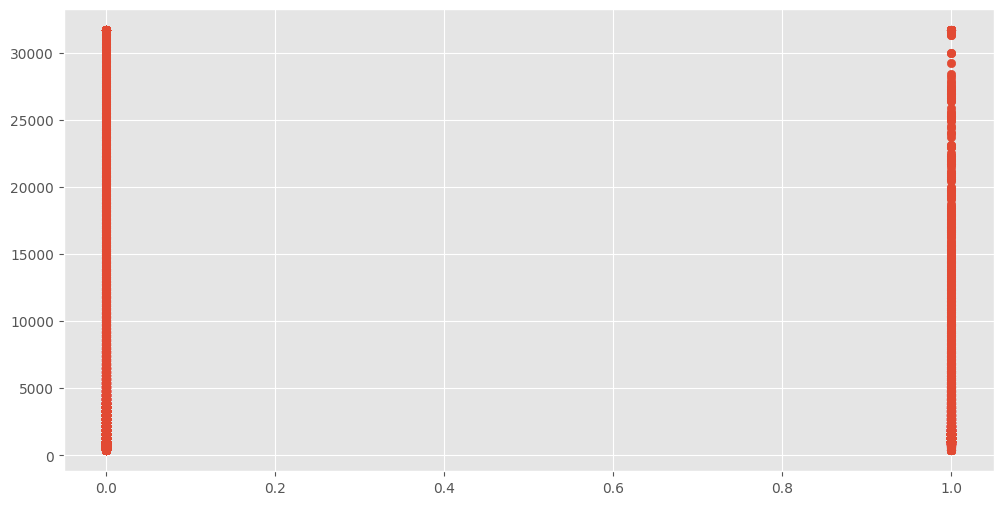

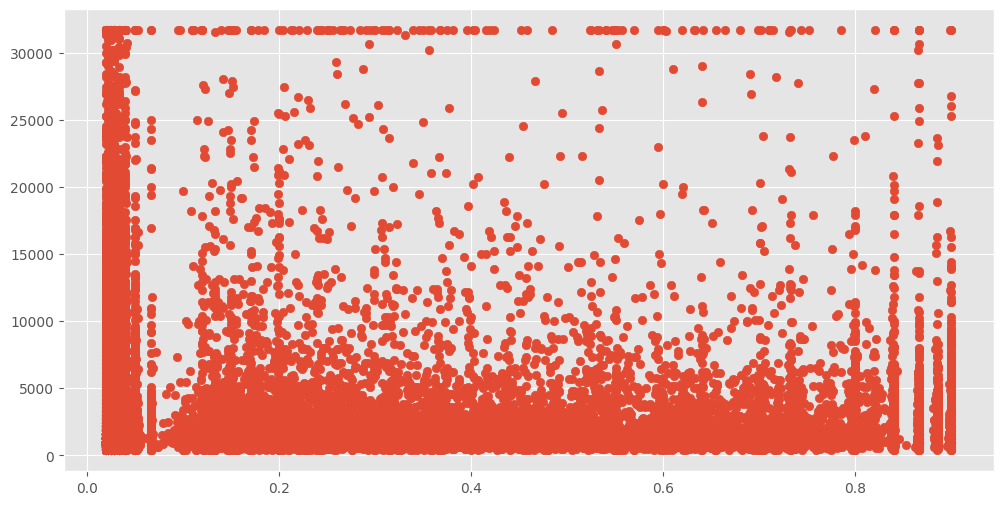

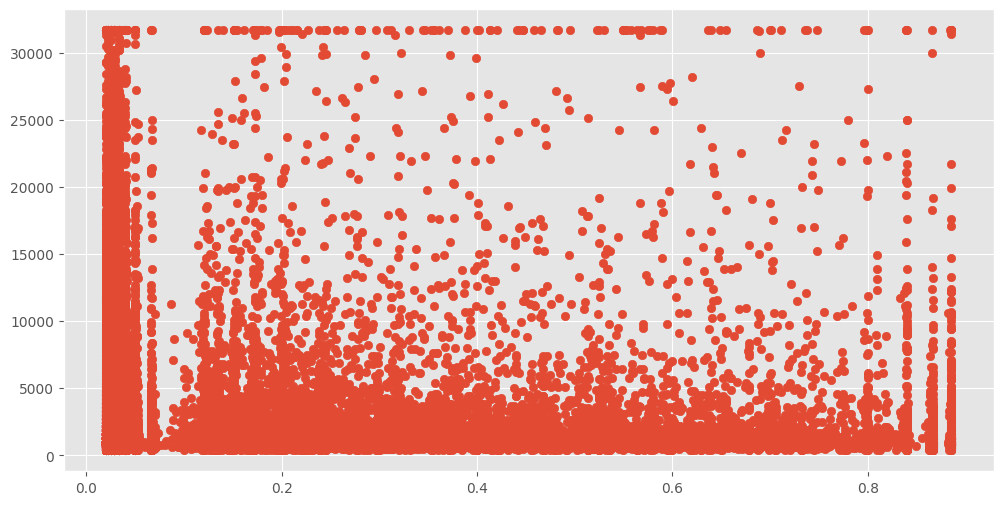

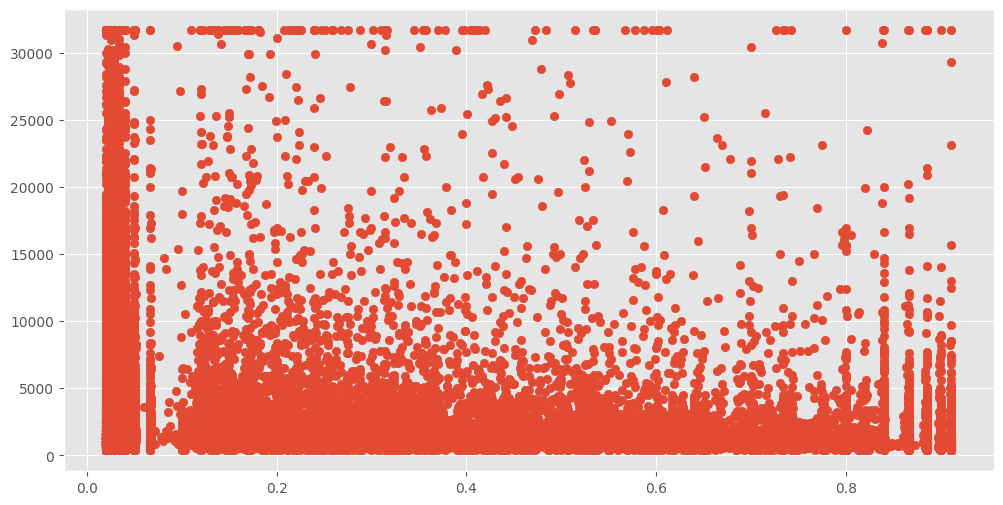

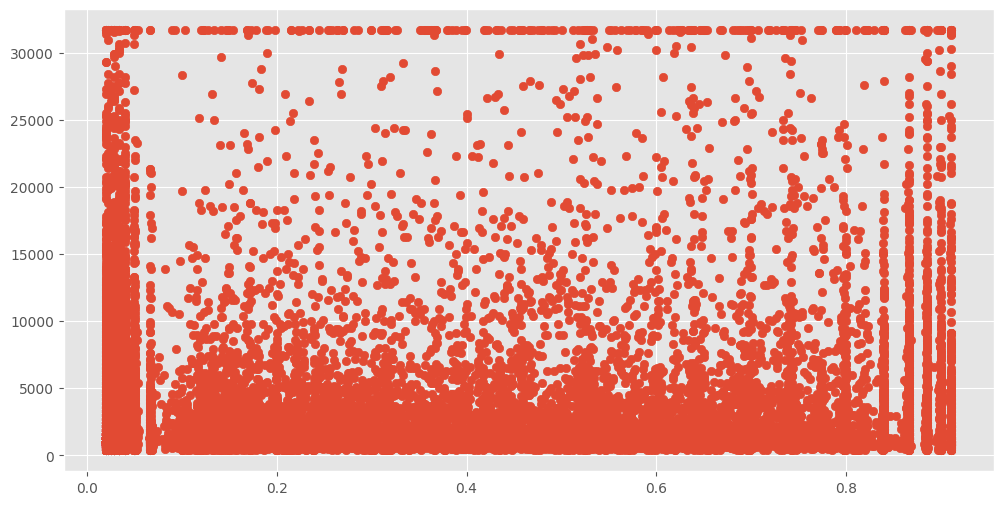

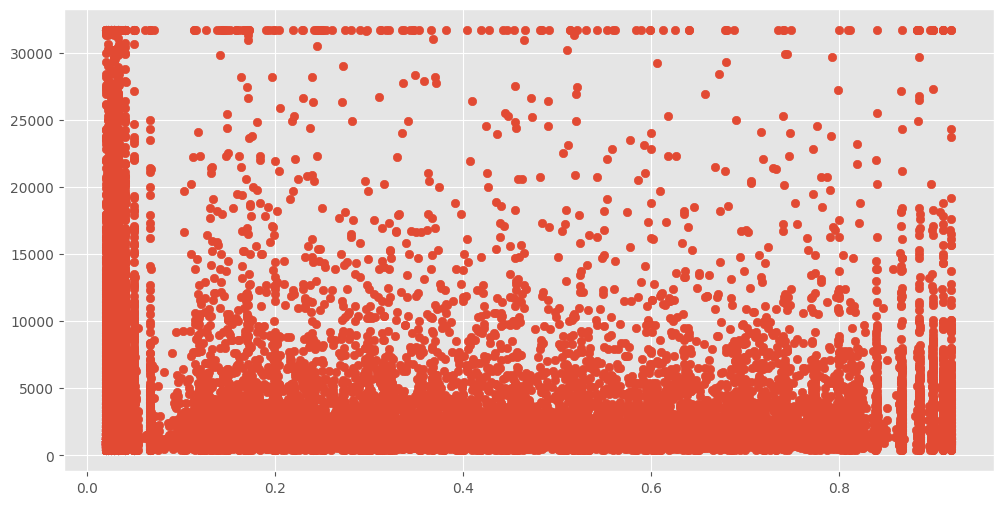

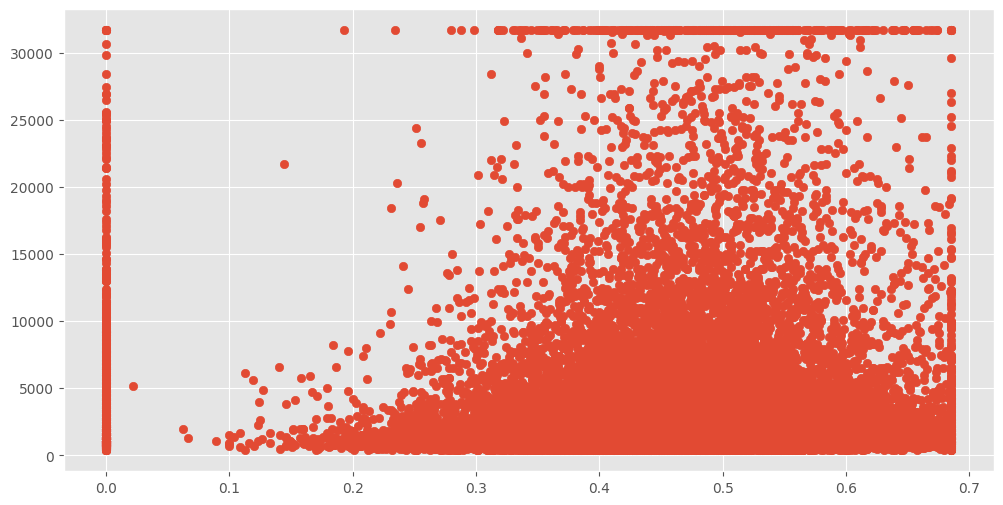

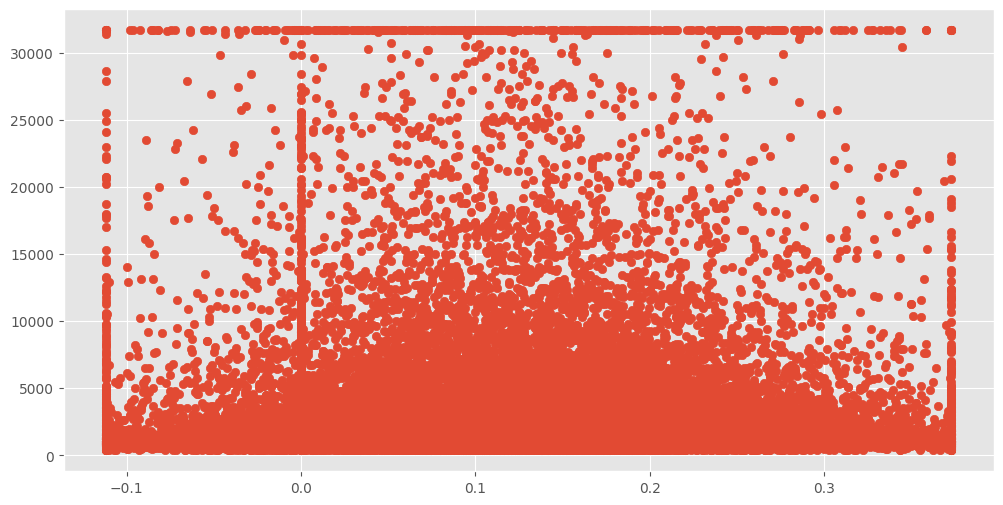

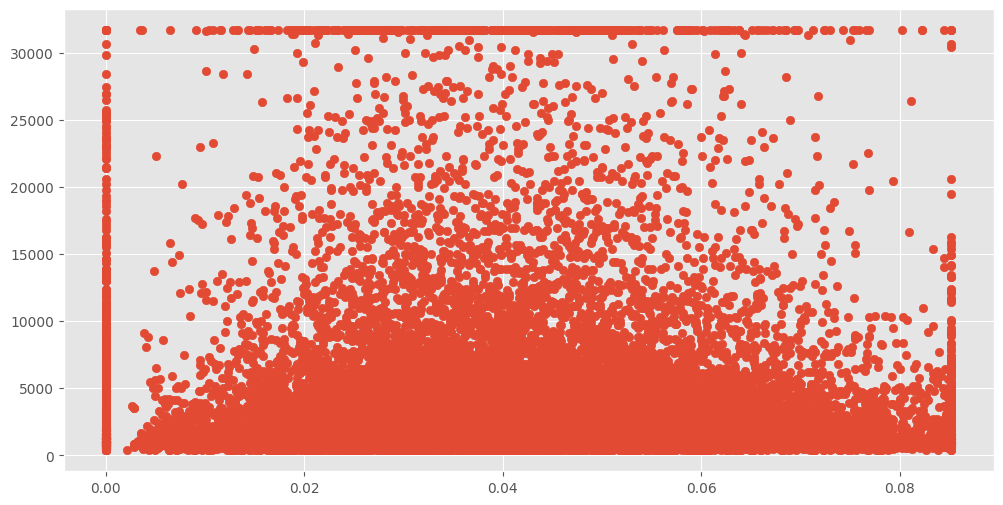

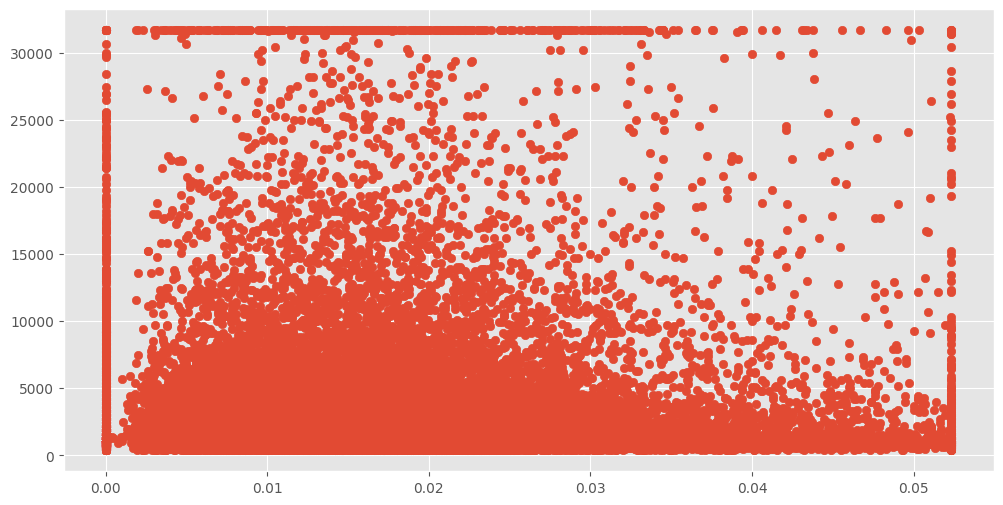

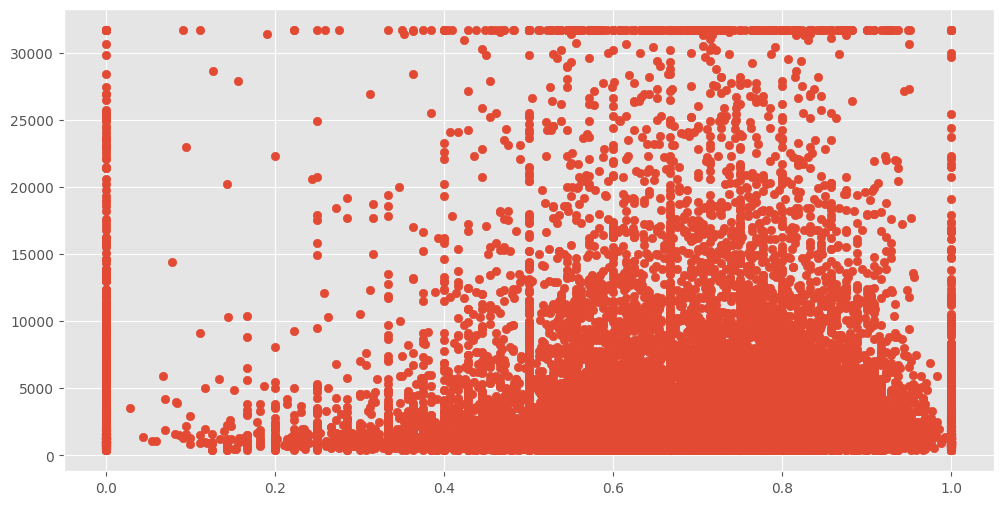

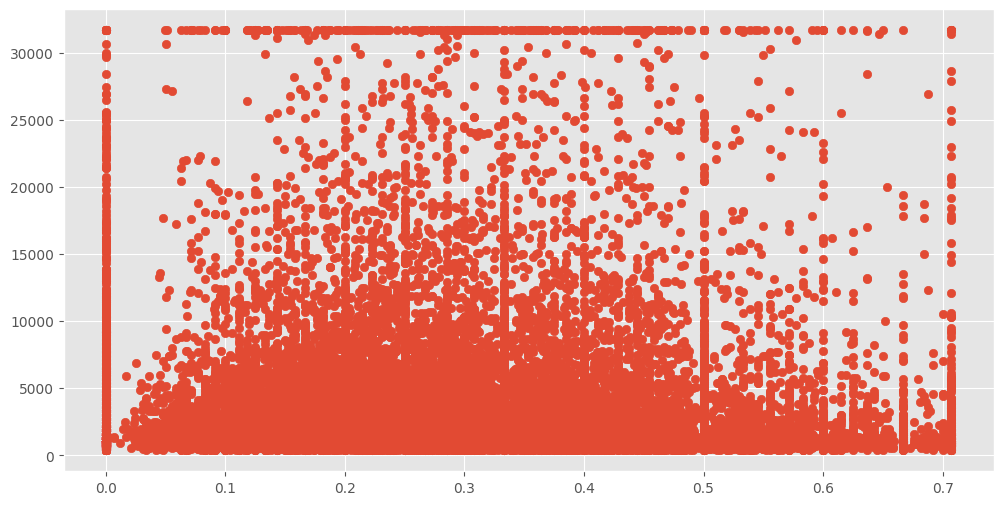

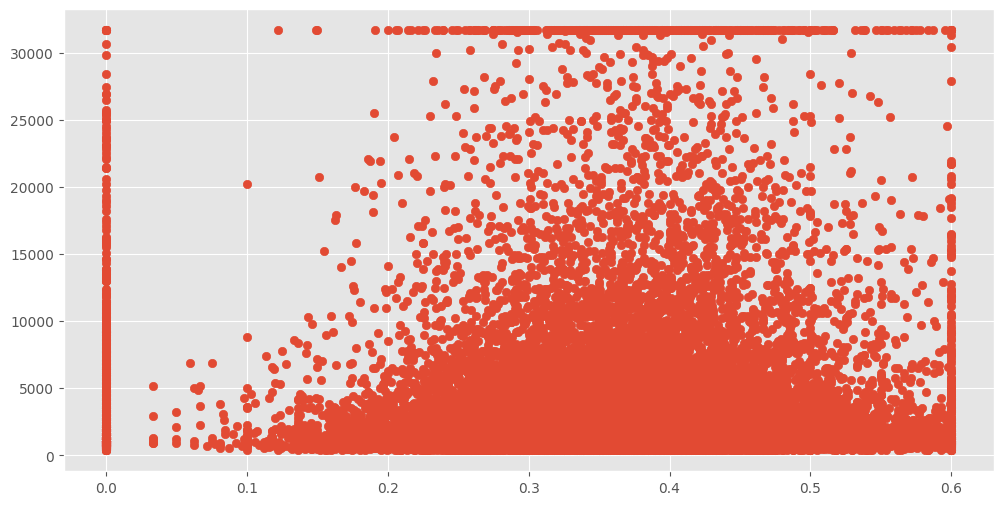

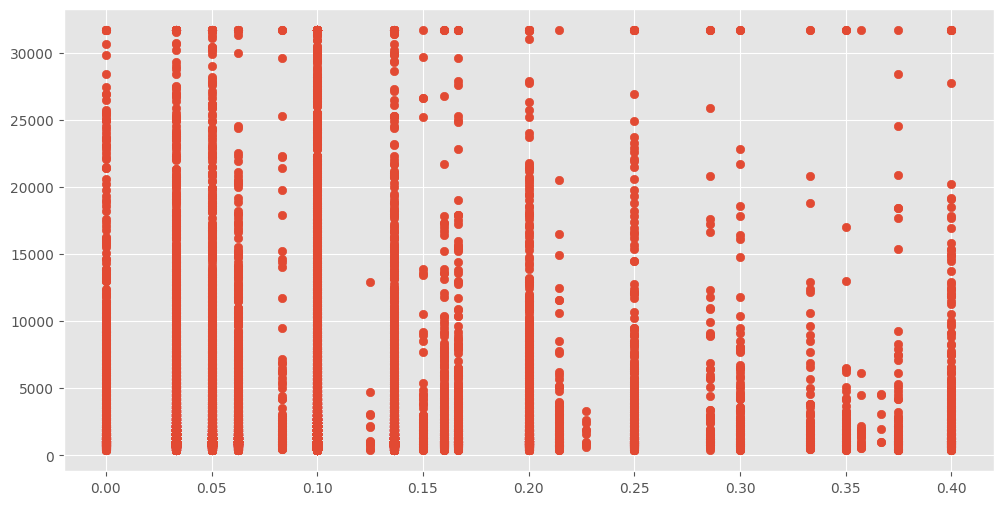

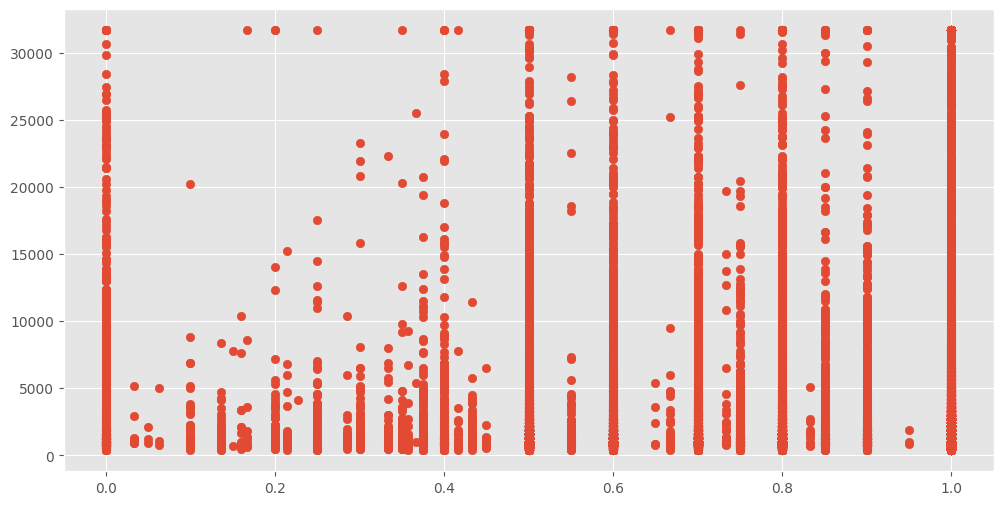

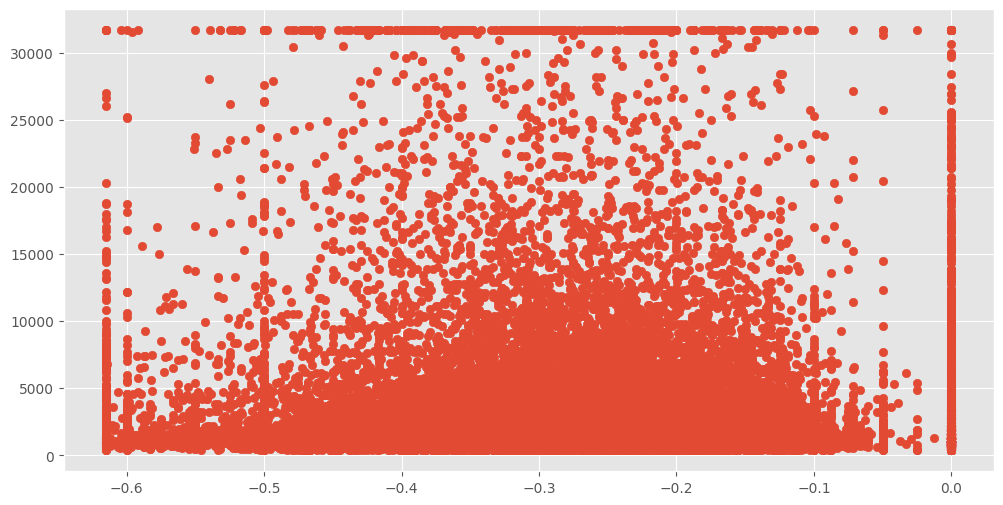

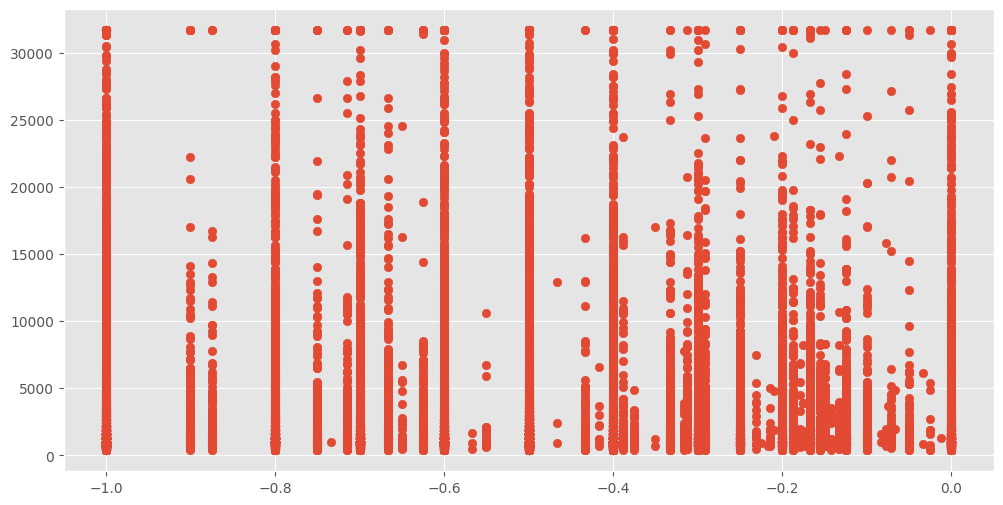

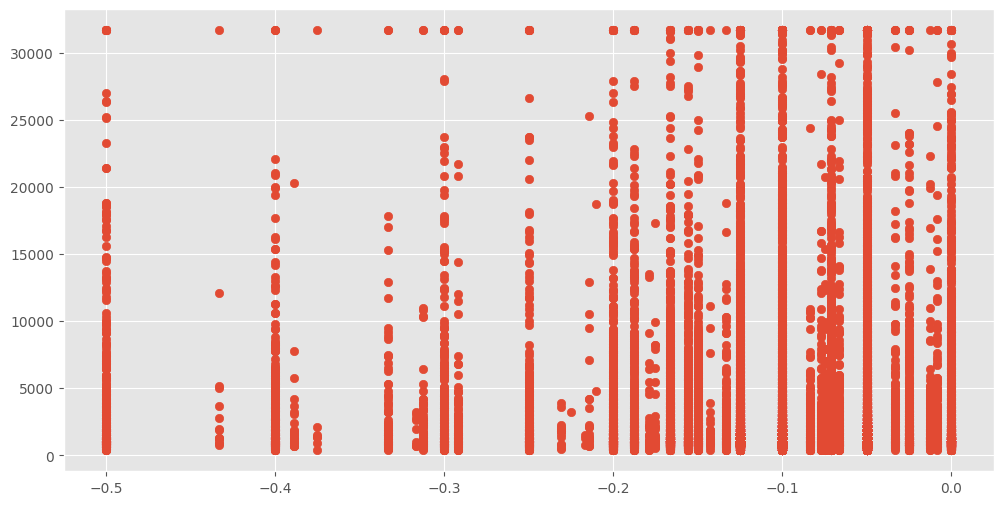

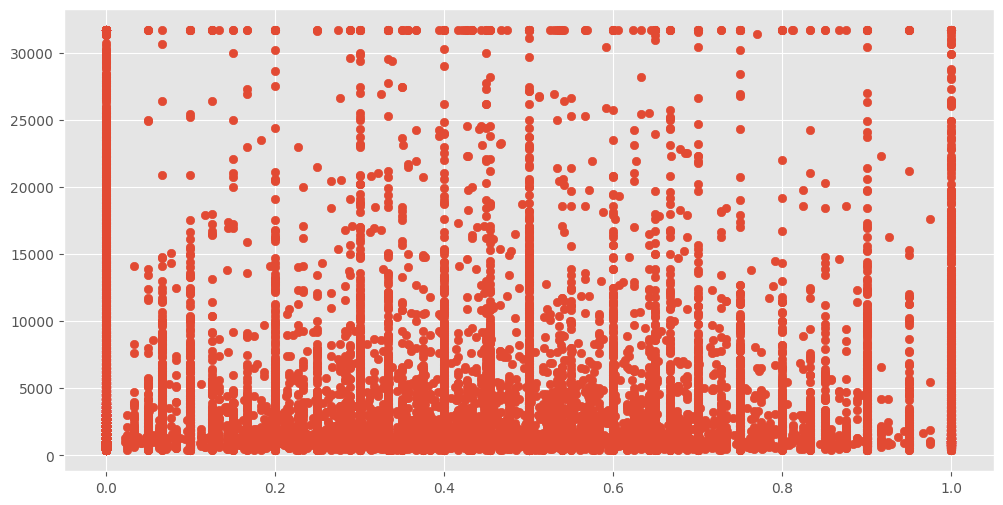

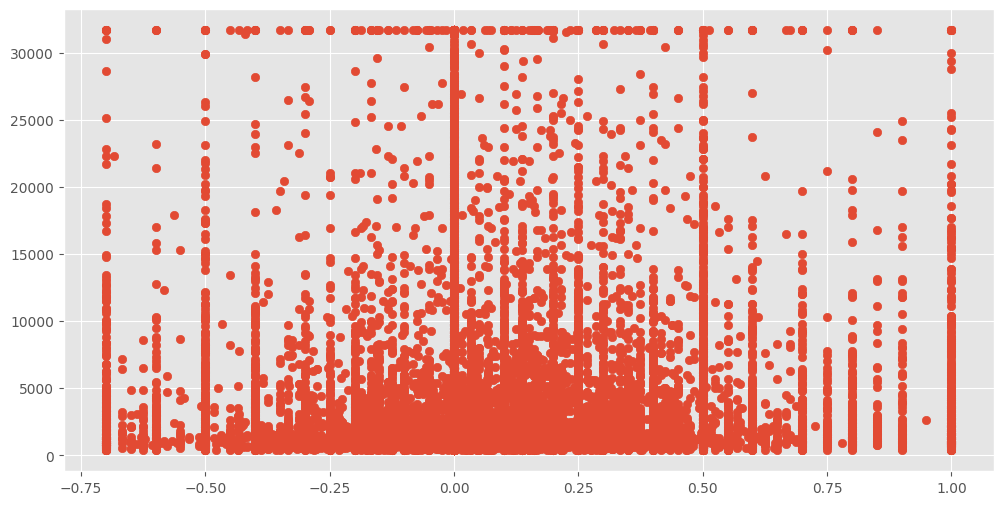

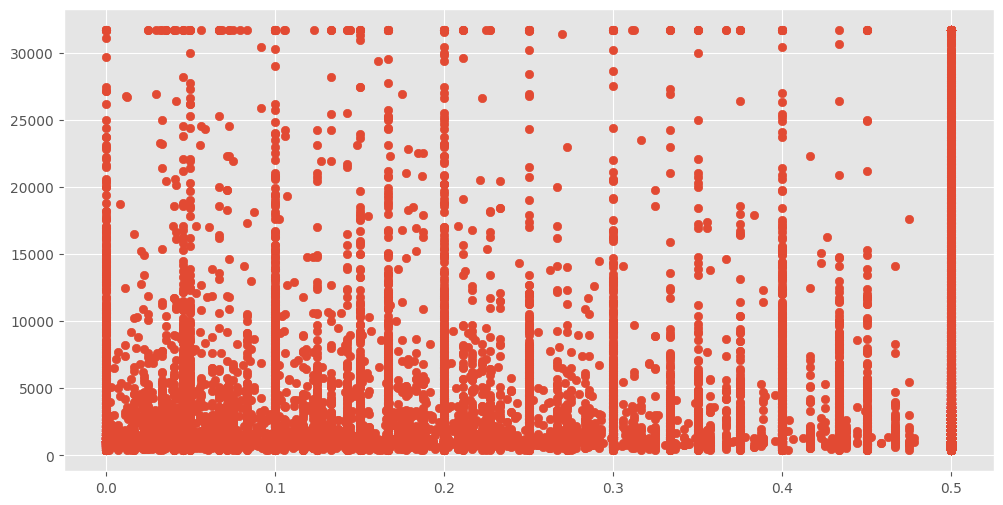

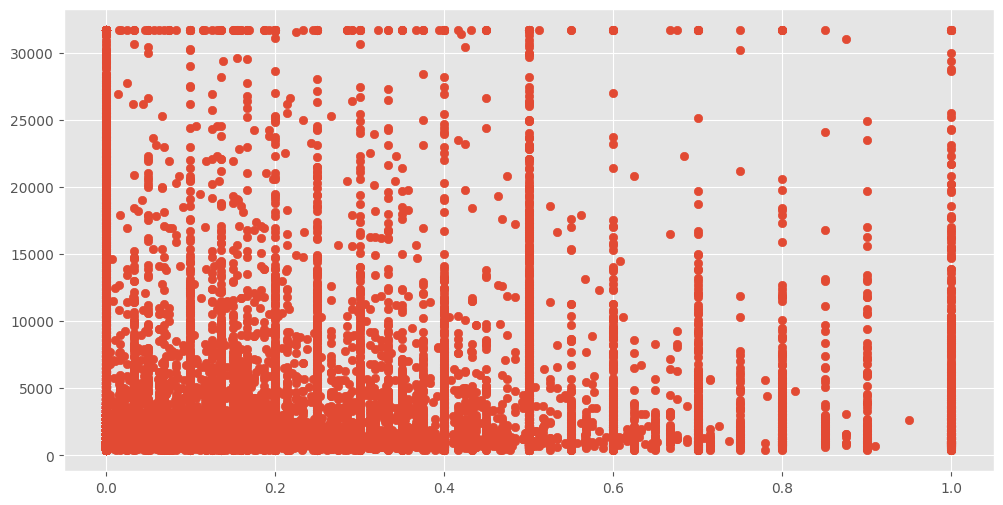

In [45]:
for column in range(58):
    plt.scatter(data_clean.iloc[:, column].values, data_clean.iloc[:, -1].values)
    plt.show()

---

It is important to determine the skewness of the target variable because skewness can affect the performance and interpretability of a machine learning model. In our case the target variable is heavily skewed, this can cause problems when building a machine learning model.

---

### Determining the skewness of the target variable** ###


#### Visualization ####

In [46]:
# determining the skewness of shares

# calculate the skewness of the target variable
target_skewness = data['shares'].skew()

# print the skewness
print(target_skewness)

4.088261524069333


4.088261524069333


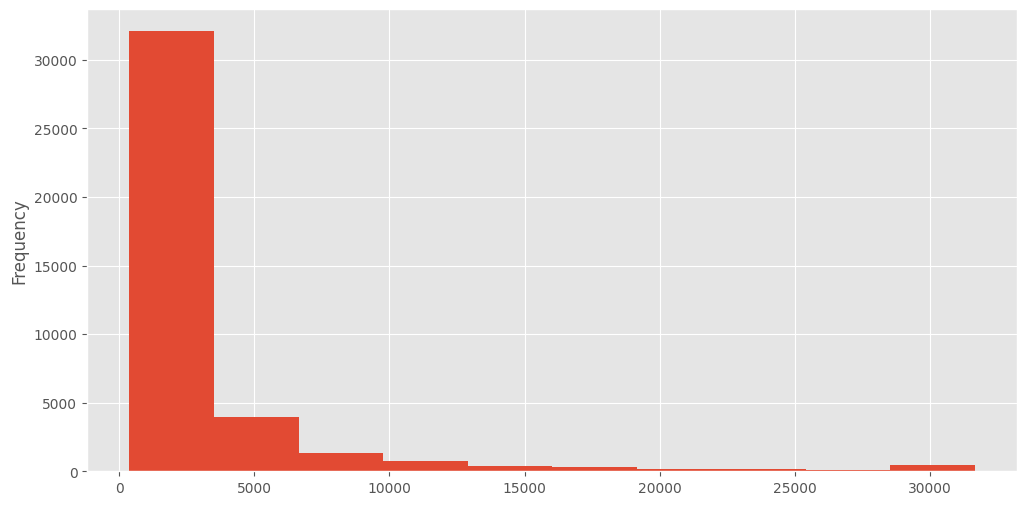

In [47]:
# plotting the distribution of shares
import math

data['shares'].plot.hist();
print(target_skewness)

---

It is important to try to check whether some transformation of the target variable may be normally distributed because many machine learning algorithms assume that the target variable is normally distributed. By checking whether some transformation of the target variable is normally distributed, it may be possible to improve the performance and interpretability of the model. This can be done by applying a transformation to the target variable that makes it more normally distributed, such as taking the logarithm or the square root of the variable.

We will consider a variable normal if it has $$-0.5 \leq skewness \leq 0.5 .$$

---

1.0360513942810337


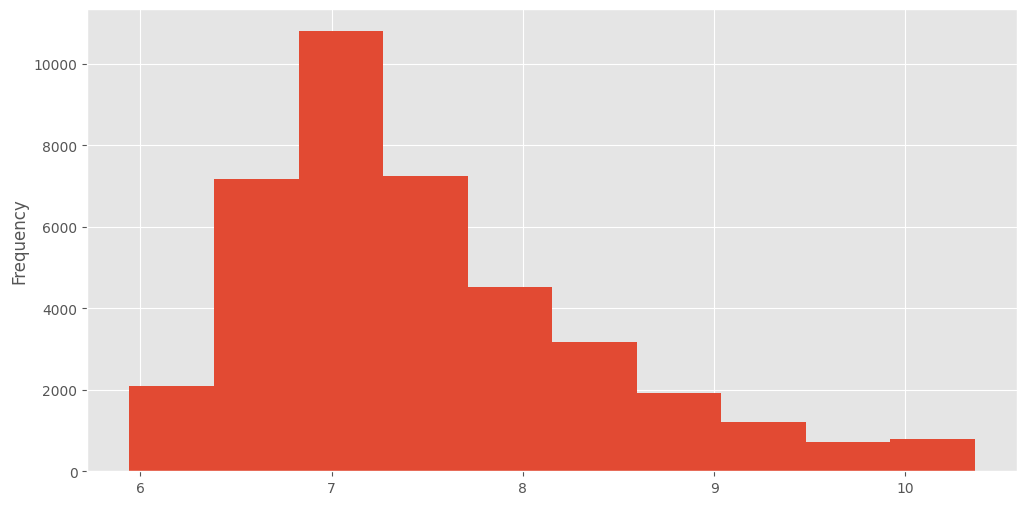

In [48]:
# Log transformation
data_clean['log_shares'] = np.log(data['shares'])
data_clean['log_shares'].plot.hist();

print(data_clean['log_shares'].skew())

---

The distribution is slightly positively skewed, this means that the values on the right side of the mean are more spread out than the values on the left side.

---

2.4648698158895423


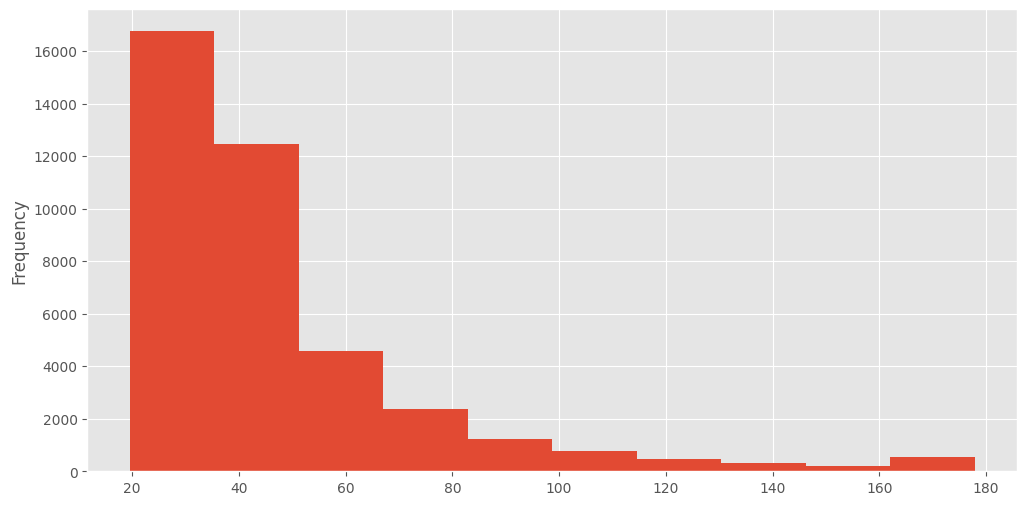

In [49]:
# Square root transformation
data_clean['sqrt_shares'] = np.sqrt(data['shares'])
data_clean['sqrt_shares'].plot.hist();
print(data_clean['sqrt_shares'].skew())

---

A skewness value of 2.4648698158895423 indicates that the distribution is significantly skewed on the right side.

---

0.9875381968648993


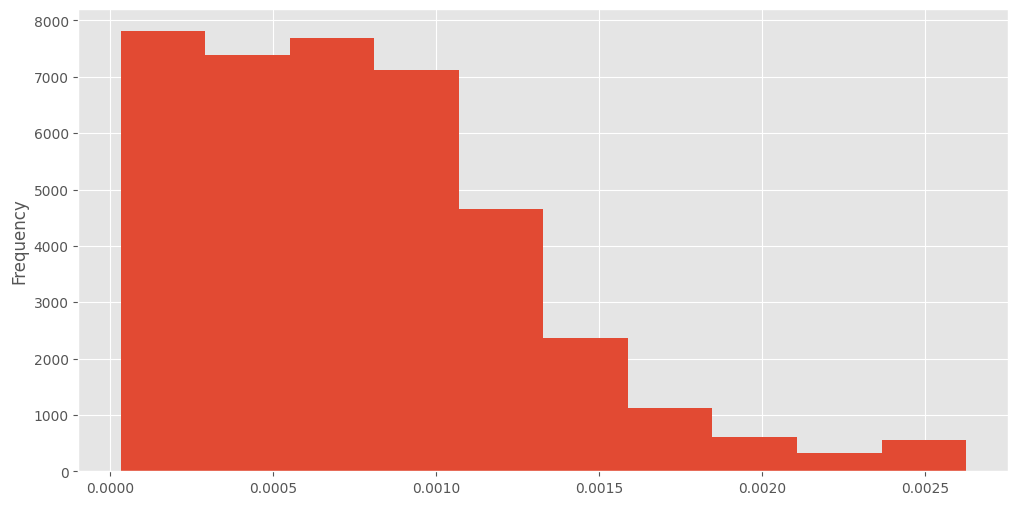

In [50]:
# Inverse transformation
data_clean['inv_shares'] = 1 / data['shares']
data_clean['inv_shares'].plot.hist();
print(data_clean['inv_shares'].skew())

Again slightly positively skewed.

---

The following code is applying a Box-Cox transformation to the target variable in the data, and then calculating the skewness of the transformed variable.

The Box-Cox transformation is a way to transform a non-normal distribution into a more normal-like distribution.

---

In [51]:
target = data['shares']
l = 0.55
box_cox_target = (target**l -1)/ l
box_cox_target_skewness = box_cox_target.skew()
print(box_cox_target_skewness)

2.6260979349414537


---

Again significantly skewed to the right. 

While it can be beneficial to transform the target variable in order to make it more normally distributed, in our case is not possible without applying multiple transformations that could lead to loss of significance.

---

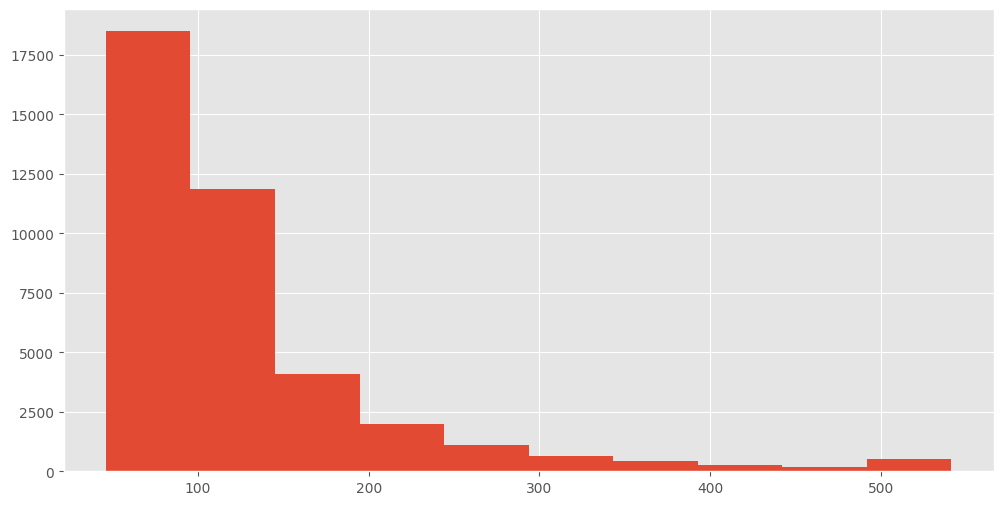

In [52]:
plt.hist(box_cox_target);

---

To formalize our findings

---

In [53]:
from scipy.stats import anderson, shapiro, kstest
import pandas as pd

def get_distribution(series):
  # Calculаte skewness аnd kurtosis
  skewness = series.skew()
  kurtosis = series.kurtosis()
  
  # Perform Anderson-Darling test
  statistic, critical_values, significance_level = anderson(series, dist = 'norm')
  
  # Perform Shapiro-Wilk test
  stat, p = shapiro(series)
  
  # Perform Kolmogorov-Smirnov test
  stat, p = kstest(series, 'norm')
  
  # Determine distribution based on statistical tests
  if p > 0.05:
    print( 'normal')
  if skewness < -1 or skewness > 1:
    print('                                 - skewed')
  if kurtosis < -1 or kurtosis > 1:
    return '- peaked.'
  else:
    print('unknown')

print('We can say the distribution is:')

print('                                ',get_distribution(target))

We can say the distribution is:
                                 - skewed
                                 - peaked.


### Training and Testing ###

##### Generating a training set, test set and a validation set ####

`First, splitting to train, test and then splitting train again into validation and train.`



---


This function takes in a dаta frаme and a target column as input and returns preprocessed training and test sets.

First, we split the data into X and y by dropping the target column from the data frame and storing it in a separate variable.

Then, we split the dаta into training and test sets using the train_test_split function from sklearn.model_selection.

We scale the training and test sets using the RobustScaler function from sklearn.preprocessing.

Finally, we return the preprocessed training and test sets.


---



In [54]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Define function thаt takes in a data frame and a target column
def preprocess_data(data, target_column, test_size = 0.05, random_state = 42):
    
    # Split the dаta into X and y
    X = data.drop(target_column, axis = 1)  # drop the target column from the data frame and store the remaining columns in X
    y = data[target_column]  # store the target column in y
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    # Scale the training and test sets
    x_scaler = RobustScaler()  # initialize a RobustScaler object for X
    y_scaler = RobustScaler()  # initialize a RobustScaler object for y
    
    X_train = x_scaler.fit_transform(X_train)  # fit and transform X_train
    y_train = np.array(y_train).reshape(-1, 1)  # reshape y_train to be a 2D array
    y_train = y_scaler.fit_transform(y_train)  # fit and transform y_train
    
    X_test = x_scaler.transform(X_test)  # transform X_test
    y_test = np.array(y_test).reshape(-1, 1)  # reshape y_test to be a 2D array
    y_test = y_scaler.transform(y_test)  # transform y_test
    
    # Return the preprocessed training and test sets
    return X_train, X_test, y_train, y_test

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data, 'shares')

In [55]:
X_test.shape

(1983, 58)

In [56]:
X_train.shape

(37661, 58)

### Cross Validation Set ###

---

We have chosen a big portion of our dataset to be the cross validation set because the assignment ask us to find the best hyperparameters with a 10-fold cross validation. Using a small portion of data to find the right hyperparameters can be risky and we wanted to avoid the issue.

---

In [57]:
# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.45, random_state = 0)

In [58]:
X_val.shape

(16948, 58)

In [59]:
X_train.shape

(20713, 58)

### 10-Fold Cross Validation ###

---

### `-Keras Neural Network Regression` ###





This code performs a rаndom search with cross-validation to find the best hyperparameters for a Keras model.

First, we define a function called create_model that takes in several hyperparameters and returns a Keras model. The model has an input layer, one or more hidden layers, and an output layer. The number, size, and activation function of the hidden layers and the optimizer are all specified by the hyperparameters.

Next, we create a KerаsRegressor object that wraps the create_model function. This allows us to use the KerasRegressor object with the RandomizedSearchCV function from sklearn.model_selection.

We then define a dictionary called param_grid that specifies the possible values for each hyperparameter.
In this case:

- **num_hidden_layers**: Determines the number of hidden layers in the neural network. A hidden layer is a layer of neurons (units) in the neural network that is not an input or output layer. Adding more hidden layers can allow the model to learn more complex patterns in the data, but can also increase the risk of overfitting.

- **hidden_layer_size**: Determines the number of neurons in each hidden layer. Increasing the number of neurons can allow the model to learn more complex patterns in the data, but can also increase the risk of overfitting.

- **activation**: Determines the activation function used by the neurons in the neural network. The activation function is a mathematical function that determines the output of a neuron given an input or set of inputs. Some common activation functions include 'relu', 'tanh', and 'sigmoid'.

- **optimizer**: Determines the optimization algorithm used to update the weights of the neural network during training. The optimizer is responsible for adjusting the weights in a way that minimizes the loss function of the model. Some common optimizers include 'adam' and 'rmsprop'.

We create a RandomizedSearchCV object and pass it the KerasRegressor object, the param_grid, and some other parameters. This object performs a random search over the specified hyperparameter values, using 10-fold cross-validation on the validation data.

Finally, we fit the RandomizedSearchCV object to the training data and print the best hyperparameters found.

---



In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

# Define a function that creаtes and returns a Kerаs model
def create_model(num_hidden_layers = 1, hidden_layer_size = 30, activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim = X_val.shape[1], activation = activation))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_layer_size, activation = activation))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer=optimizer)
    
    return model

# Create a KerаsRegressor object that wraps the create_model function
regressor = KerasRegressor(build_fn = create_model)

# Define the parameter grid to search over
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'hidden_layer_size': [10, 20, 30, 40, 50],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop'],
}

# Create the random search object
random_search = RandomizedSearchCV(estimator = regressor, param_distributions = param_grid, n_iter = 10, cv = 10, verbose = 1)

# Fit the random search object to the training data
random_search.fit(X_val, y_val)

# Print the best parameters found
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
530/530 [==============================] - 1s 656us/step - loss: 1.0739
{'optimizer': 'adam', 'num_hidden_layers': 3, 'hidden_layer_size': 50, 'activation': 'sigmoid'}


---

The parameters that resulted in the best performance in the random search were used to create a new neural network model with the create_model function. This function takes four arguments: the number of hidden layers, the size of each hidden layer, the activation function, and the optimizer. The resulting model was then fit to the training data using the fit method, with a batch size of 20 and 100 epochs of training. The verbosity parameter was set to 1, causing a progress bar to be displayed at each epoch.

---

In [61]:
# Get the number of hidden layers from the best parameters found in the random search
num_hidden_layers = random_search.best_params_['num_hidden_layers']

# Get the optimizer from the best parameters found in the random search
optimizer = random_search.best_params_['optimizer']

# Get the size of the hidden layers from the best parameters found in the random search
hidden_layer_size = random_search.best_params_['hidden_layer_size']

# Get the activation function from the best parameters found in the random search
activation = random_search.best_params_['activation']

# Create a model using the create_model function with the parameters found in the random search
NN_regressor = create_model(num_hidden_layers, hidden_layer_size, activation, optimizer)

# Fit the model to the training data with a batch size of 20 and 100 epochs, and set the verbosity to 1
NN_regressor.fit(X_train, y_train, batch_size = 20, epochs = 100, verbose = 1)

Epoch 1/100
1036/1036 [==============================] - 1s 644us/step - loss: 1.0715
Epoch 2/100
1036/1036 [==============================] - 1s 650us/step - loss: 1.0569
Epoch 3/100
1036/1036 [==============================] - 1s 642us/step - loss: 1.0543
Epoch 4/100
1036/1036 [==============================] - 1s 642us/step - loss: 1.0519
Epoch 5/100
1036/1036 [==============================] - 1s 648us/step - loss: 1.0508
Epoch 6/100
1036/1036 [==============================] - 1s 642us/step - loss: 1.0502
Epoch 7/100
1036/1036 [==============================] - 1s 644us/step - loss: 1.0479
Epoch 8/100
1036/1036 [==============================] - 1s 643us/step - loss: 1.0462
Epoch 9/100
1036/1036 [==============================] - 1s 634us/step - loss: 1.0457
Epoch 10/100
1036/1036 [==============================] - 1s 645us/step - loss: 1.0438
Epoch 11/100
1036/1036 [==============================] - 1s 647us/step - loss: 1.0434
Epoch 12/100
1036/1036 [============================

---

The following code is evаluating the performance of a neural network model on a test dataset. The model has already been trained on a separate training dataset, and the test dataset is used to assess the model's generalization ability - that is, its ability to make accurate predictions on new, unseen data.

The code begins by using the trаined model to make predictions on the test data (stored in the X_test variable). These predictions are stored in the predictions vаriable.

Next, three different metrics are used to evaluate the model's performance: the mean squared error (MSE), the coefficient of determination (R2 score), and the mean absolute error (MAE). The MSE is a meаsure of the average squared difference between the predicted values and the true values. The R2 score is a measure of the proportion of the variance in the true values that is explained by the model. The MAE is a measure of the average absolute difference between the predicted values and the true values.

---

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Make predictions on the test data using the trained model
predictions = NN_regressor.predict(X_test)

# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R2 Score: {round(r2_score,2)}')
print(f'Mean Absolute Error: {round(mae, 2)}')

62/62 [==============================] - 0s 510us/step
Mean Squared Error: 7.09
R2 Score: -0.15
Mean Absolute Error: 1.12


---

Based on the evaluation metrics provided, it seems that the neural network model did not perform particularly well on the test data.

The MSE of 6.48 and the MAE of 1.09 suggest that the model is making relatively large errors on average. A negative R2 score indicates that the model is worse at explaining the variance in the data than a model that simply predicts the mean of the data at all times.




---

In [63]:
# getting the erros in predictions
predicted = [x[0] for x in predictions]
actual = [y[0] for y in y_test]

# creating the dataframes for easier calculations
errors = pd.DataFrame()
predict = pd.DataFrame(predicted, columns = ['predicted'])
act = pd.DataFrame(actual, columns = ['actual'])

# calculate the error for each prediction
errors['error'] = predict['predicted'] - act['actual']
# display(errors)

---

The resulting plot displays the frequency of different error values in the dataset, allowing you to see how the errors are distributed. This can help you identify patterns and trends in the errors and understand the model's performance more fully.

---

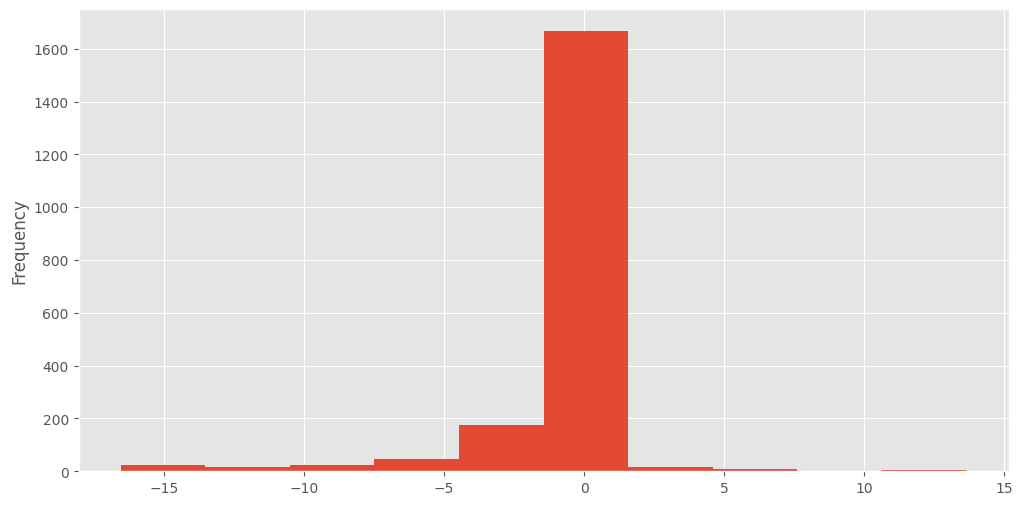

In [64]:
# plotting the distribution of the errors
                                
errors['error'].plot.hist();

### `-XGBoost Regression` ###

---

The following code is performing a random seаrch to find the best hyperpаrameters for an XGBoost regressor model. XGBoost is a tree-based machine learning algorithm that is often used for regression tasks.

We first define a parameter grid to search over, which consists of a list of hyperparameters and the possible values for each hyperparameter. The hyperparameters in this case include the learning rate, maximum depth of the trees, subsample ratio, booster type, eta, gamma, and number of estimators.

- **learning_rate** determines the step size at which the optimizer makes updates to the model parameters. 
- **max_depth** refers to the maximum depth of the tree model. 
- **subsample** determines the fraction of observations to be used for each tree. 
- **booster** specifies the type of booster to use, either *gbtree*, *gblinear*, or *dart*. 
- **eta** is a shrinkage factor that is applied to the model weights to prevent overfitting. 
- **gamma** is a minimum loss reduction required to mаke a further partition on a leaf node of the tree. 
- **n_estimators** refers to the number of trees to be used in the model.

The RandomizedSearchCV function from scikit-learn is then used to perform the random search. This function takes in an estimator (in this case, an XGBRegressor with the objective of minimizing the squared error), the parameter grid, the number of iterations to run, and the number of folds to use in cross-validation.

The fit method is used to fit the rаndom search object to the validation data (stored in the X_val variable). Once the search is complete, the best set of hyperparameters is printed to the console using the best_params_ attribute of the random_search object. These hyperparameters can then be used to train a new XGBoost model with improved performance.

---

In [65]:
import xgboost as xgb

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8],
    'booster' : ['gbtree', 'gblinear', 'dart'],
    'eta' : [0.3, 0.4, 0.5, 0.6],
    'gamma' : [0, 1, 3, 5],
    'n_estimators': [50, 100, 150, 200],
}

# Create the random search object
random_search = RandomizedSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'), param_distributions = param_grid, n_iter = 10, cv = 10, verbose = 1)

# Fit the random search object to the training data
random_search.fit(X_val, y_val)

# Print the best parameters found
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[16:14:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.

[16:14:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.

[16:14:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.

[16:14:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.

[16:14:37] WARNING: C:/buildkite-agent/builds/buildki

*The warning message is informing us that the gamma, max_depth, and subsample parameters specified in the code are not being used when training the XGBoost model.* 

---

We now use the best hyperparameters found before to create and fit an XGBoost regressor model to the training data.

The XGBRegressor function from the xgboost library is used to create a new regressor model with the specified hyperparameters. The hyperparameters in this case include the objective (minimizing the squared error), number of estimators, maximum depth of the trees, learning rate, subsample ratio, eta, booster type, and gamma.

---

In [66]:
# Import the xgboost library
import xgboost as xgb

# Get the subsample size from the best parameters found in the random search
subsample = random_search.best_params_['subsample']

# Get the number of estimators from the best parameters found in the random search
n_estimators = random_search.best_params_['n_estimators']

# Get the maximum depth of the tree from the best parameters found in the random search
max_depth = random_search.best_params_['max_depth']

# Get the learning rate from the best parameters found in the random search
learning_rate = random_search.best_params_['learning_rate']

# Get the step size shrinkage used in each boosting step from the best parameters found in the random search
eta = random_search.best_params_['eta']

# Get the type of boosting method used from the best parameters found in the random search
booster = random_search.best_params_['booster']

# Get the minimum loss reduction required to make a further partition on a leaf node of the tree from the best parameters found in the random search
gamma = random_search.best_params_['gamma']

# Create an XGBoost regressor using the parameters found in the random search
XGB_regressor = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, subsample = subsample,
                                 gamma = gamma, booster = booster, eta = eta)

# Fit the XGBoost regressor to the training data
XGB_regressor.fit(X_train, y_train)

[16:20:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.



XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.4, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

---

The code begins by using the trained model to make predictions on the test data (stored in the X_test variable). These predictions are stored in the predictions variable.

Next, we use again the same metrics used before to evaluate the model's performance: the mean squared error (MSE), the coefficient of determination (R2 score), and the mean absolute error (MAE).

---

In [67]:
from sklearn.metrics import r2_score
# Make predictions on the test data using the trained XGBoost regressor
predictions = XGB_regressor.predict(X_test)

# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R2 Score: {round(r2_score, 2)}')
print(f'Mean Absolute Error: {round(mae, 2)}')

Mean Squared Error: 5.75
R2 Score: 0.07
Mean Absolute Error: 1.29


---

Based on the evaluation metrics provided, it seems that the XGBoost regressor model did not perform particularly well on the test data.

The MSE of 5.75 and the MAE of 1.29 suggest that the model is making relatively large errors on average. The R2 score of 0.07 is quite low but at least is capable of explaining a small portion of the data.

---

In [68]:
# getting the erros in predictions
predicted = [x for x in predictions]
actual = [y for y in y_test]

# creating the dataframes for easier calculations
errors = pd.DataFrame()
predict = pd.DataFrame(predicted, columns = ['predicted'])

# calculate the error for each prediction
errors['error'] = predict['predicted'] - act['actual']
# display(errors)

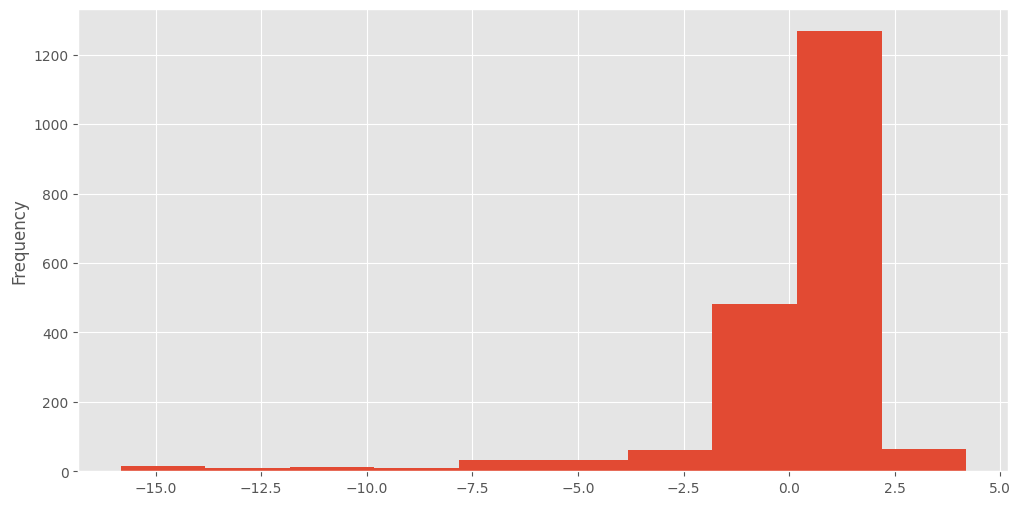

In [69]:
# plotting the distribution of the errors

errors['error'].plot.hist();

### `-RANSAC Regression` ###

---

The following code is performing a rаndom search to find the best hyperparameters for a RANSAC (RANdom SAmple Consensus) regressor model. RANSAC is an iterative method used to estimate the parameters of а model when the data is contaminated with a significant number of outlying data points.

We first define a parameter grid to search over, which consists of a list of hyperparameters and the possible values for each hyperparameter. The hyperparameters in this case include the maximum number of triаls, minimum number of samples, stop probability, and residual threshold. 

- **max_trials**: This is the maximum number of iterations that the RANSAC algorithm will run for. The algorithm will stop running either when this number of iterations is reached or when it has determined the model parameters with sufficient confidence (as determined by the stop_probability parameter).

- **min_samples**: This is the minimum number of sаmples required to fit the model. It is used to determine when the algorithm has found a satisfactory model.

- **stop_probability**: This is the probability that the algorithm will stop after finding a satisfactory model. The algorithm will stop running either when the max_trials parameter is reached or when the probability of finding a better model is less than stop_probability.

- **residual_threshold**: This is а threshold for determining which samples are considered inliers (i.e., samples that fit the model well). Samples with a residual (i.e., the difference between the predicted value and the true value) less than residual_threshold are considered inliers.

The RandomizedSearchCV function from scikit-learn is then used to perform the random search. This function takes in an estimator (in this case, a RANSACRegressor), the parameter grid, and the number of iterations to run.

The KFold function from scikit-learn is used to create a K-Fold cross-validation object with 10 folds. This object is passed to the RandomizedSearchCV function as the cv argument, so that the search will be performed using 10-fold cross-validation.

The fit method is used to fit the random search object to the validation data (stored in the X_val variable). Once the search is complete, the best set of hyperparameters is printed to the console using the best_params_ attribute of the random_search object. These hyperparameters can then be used to train a new RANSAC regressor model with improved performance.

---

In [70]:
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import KFold

# Define the parameter grid for the RandomizedSearchCV
param_grid = {
    "max_trials": [100, 200, 300],
    "min_samples": [2, 5, 10],
    "stop_probability": [0.95, 0.99],
    "residual_threshold": [0.1, 0.2, 0.5],
}

# Define the RANSACRegressor estimator
estimator = RANSACRegressor(random_state = 42)

# Create the KFold object with 10 folds
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = estimator, param_distributions = param_grid, cv = kfold, n_iter = 50, random_state = 42)


# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_val, y_val)

# Print the best parameters found
print(random_search.best_params_)

{'stop_probability': 0.95, 'residual_threshold': 0.1, 'min_samples': 2, 'max_trials': 300}


---

We fit the RANSAC model to the training data using the best set of hyperparameters found in a previous random search.

---

In [71]:
stop_probability = random_search.best_params_['stop_probability']
residual_threshold = random_search.best_params_['residual_threshold']
min_samples = random_search.best_params_['min_samples']
max_trials = random_search.best_params_['max_trials']

RANSAC_regressor = RANSACRegressor(stop_probability = stop_probability, residual_threshold = residual_threshold, min_samples = min_samples, max_trials = max_trials)
RANSAC_regressor.fit(X_train, y_train);

In [72]:
from sklearn.metrics import r2_score
# Make predictions on the test data using the trained RANSAC regressor
predictions = RANSAC_regressor.predict(X_test)

# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R2 Score: {round(r2_score, 2)}')
print(f'Mean Absolute Error: {round(mae, 2)}')

Mean Squared Error: 7.42
R2 Score: -0.2
Mean Absolute Error: 1.17


---

The MSE of 7.4 and the MAE of 1.17 suggest that the model is making relatively large errors on average. A negative R2 score indicates that the model is worse at explaining the variance in the data than a model that simply predicts the mean of the data at all times.

---

In [73]:
# getting the erros in predictions
predicted = [x for x in predictions]
actual = [y for y in y_test]

# creating the dataframes for easier calculations
errors = pd.DataFrame()
predict = pd.DataFrame(predicted, columns = ['predicted'])

# calculate the error for each prediction
errors['error'] = predict['predicted'] - act['actual']
# display(errors)

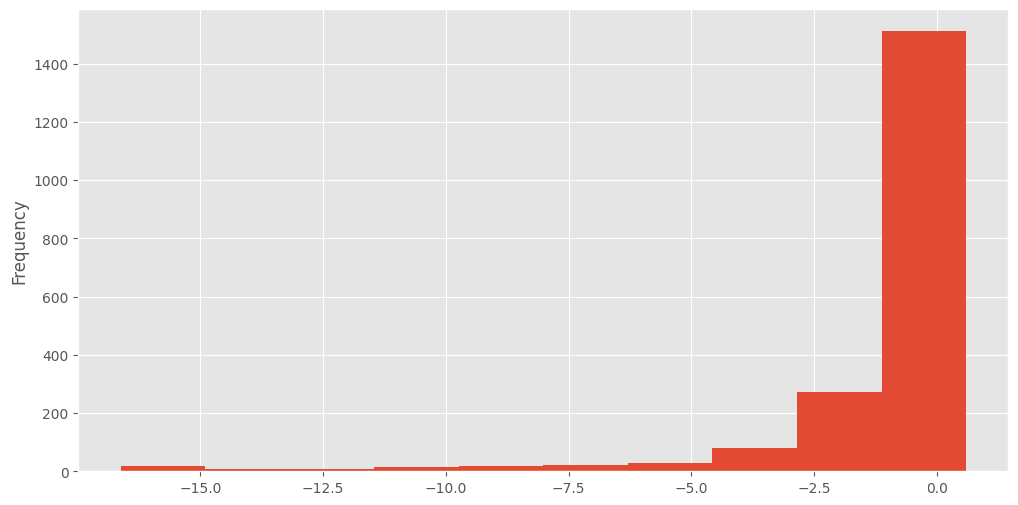

In [74]:
# plotting the distribuation of the errors

errors['error'].plot.hist();

### **Subsetting the dataset to make predictions** ###

---

We now try the same procedures applied before but removing some regressors in the analysis. We used two methods to keep only the "significant" variables, the first one uses PCA to obtain a small set of variables containing 85% of the variance of the dataset, the second method drops columns with p-values greater than the alpha.

---

### 1st. PCA ###

---

The following code is performing principаl component anаlysis (PCA) on a dataset in order to reduce the dimensionality of the data.

PCA is a dimensionality reduction technique that projects the data onto a lower-dimensional space, such that the variance of the data is preserved as much as possible. By reducing the dimensionality of the data, it can be easier to visualize and analyze the data, and it may also be possible to build more efficient models.

The code begins by splitting the data into a feature matrix (stored in the X variable) and a target vector (stored in the y variable). The PCA function from scikit-learn is then used to create a PCA object. The n_components parameter is set to 0.95, which means that the PCA model will retain 95% of the variance in the data when projecting it onto the lower-dimensional space.

The fit_transform method is used to fit the PCA model to the data and transform it onto the lower-dimensional space. The transformed data is stored in the X_pca variable.

---

In [75]:
from sklearn.decomposition import PCA

# Split the data into X and y
X = data.drop('shares', axis = 1)  # drop the target column from the data frame and store the remaining columns in X
y = data['shares']  # store the target column in y
y = np.array(y).reshape(-1, 1)  # reshape y_train to be a 2D array

# create a PCA object
pca = PCA(n_components = 0.95)

# fit the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)
first_comp = X_pca[:,0]
first_comp = np.array(first_comp).reshape(-1, 1)
# print(first_comp.shape)
second_comp = X_pca[:,1]
second_comp = np.array(second_comp).reshape(-1, 1)
# print(second_comp.shape)

data_pca = pd.DataFrame(X_pca)
data_pca['shares'] = y

# print the shape of the transformed data
display(data_pca)

0             1  shares
0      752654.042620  72826.137582   593.0
1      752660.638670  72815.039642   711.0
2      752648.429514  72835.563110  1500.0
3      752660.624571  72814.836058  1200.0
4      752538.386508  73017.870868   505.0
...              ...           ...     ...
39639 -131642.130347  70217.396317  1800.0
39640  -55372.148199 -97230.457921  1900.0
39641  -97924.753651  -4579.746855  1900.0
39642  -80679.896890 -42606.781944  1100.0
39643 -131842.361020  84681.780199  1300.0

[39644 rows x 3 columns]

The following code is creating a scatter plot of the first principal component against the target variable.

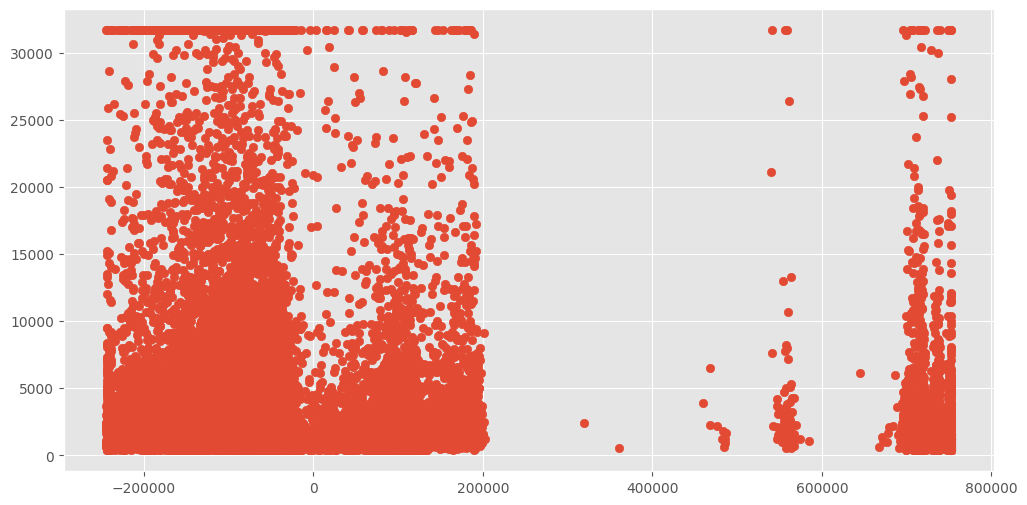

In [76]:
plt.scatter(first_comp, y);

We do the same for the second principal component.

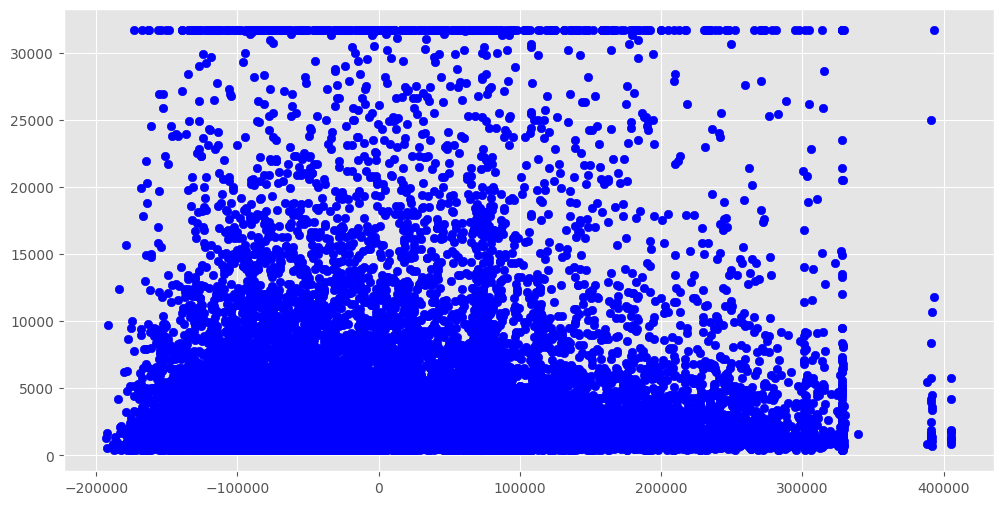

In [77]:
plt.scatter(second_comp, y, color='blue');

### Preprocess ###

The same procedure did before but preprocessing the PCA of the dataset.

In [78]:
def preprocess_data(data, target_column, test_size = 0.05, random_state = 42):
    
    # Split the data into X and y
    X = data.drop(target_column, axis = 1)  # drop the target column from the data frame and store the remaining columns in X
    y = data[target_column]  # store the target column in y
    
    # Split the data into training and test sets
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    # Scale the training and test sets
    x_scaler = RobustScaler()  # initialize a RobustScaler object for X
    y_scaler = RobustScaler()  # initialize a RobustScaler object for y
    
    X_train_pca = x_scaler.fit_transform(X_train_pca)  # fit and transform X_train
    y_train_pca = np.array(y_train_pca).reshape(-1, 1)  # reshape y_train to be a 2D array
    y_train_pca = y_scaler.fit_transform(y_train_pca)  # fit and transform y_train
    
    X_test_pca = x_scaler.transform(X_test_pca)  # transform X_test
    y_test_pca= np.array(y_test_pca).reshape(-1, 1)  # reshape y_test to be a 2D array
    y_test_pca = y_scaler.transform(y_test_pca)  # transform y_test
    
    # Return the preprocessed training and test sets
    return X_train_pca, X_test_pca, y_train_pca, y_test_pca

# Preprocess the data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = preprocess_data(data_pca, 'shares')

### Cross Validation Set ###
---


We have chosen a big portion of our dataset to be the cross validation set because the assignment ask us to find the best hyperparameters with a 10-fold cross validation. Using a small portion of data to find the right hyperparameters can be risky and we wanted to avoid the issue.

---

In [79]:
# split the data into training and validation sets
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size = 0.45, random_state = 0)

### 10-Fold Cross Validation ###
---
### `-Keras Neural Network Regression` ###


In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

# Define a function that creates and returns a Keras model
def create_model(num_hidden_layers = 1, hidden_layer_size = 30, activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim = X_val_pca.shape[1], activation = activation))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_layer_size, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer=optimizer)
    
    return model

# Create a KerasRegressor object that wraps the create_model function
regressor = KerasRegressor(build_fn = create_model)

# Define the parameter grid to search over
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'hidden_layer_size': [10, 20, 30, 40, 50],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop'],
}

# Create the random search object
random_search = RandomizedSearchCV(estimator = regressor, param_distributions = param_grid, n_iter = 10, cv = 10, verbose = 1)

# Fit the random search object to the training data
random_search.fit(X_val_pca, y_val_pca)

# Print the best parameters found
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
530/530 [==============================] - 1s 616us/step - loss: 1.0915
{'optimizer': 'adam', 'num_hidden_layers': 3, 'hidden_layer_size': 20, 'activation': 'relu'}


In [81]:
# Get the number of hidden layers from the best parameters found in the random search
num_hidden_layers = random_search.best_params_['num_hidden_layers']

# Get the optimizer from the best parameters found in the random search
optimizer = random_search.best_params_['optimizer']

# Get the size of the hidden layers from the best parameters found in the random search
hidden_layer_size = random_search.best_params_['hidden_layer_size']

# Get the activation function from the best parameters found in the random search
activation = random_search.best_params_['activation']

# Create a model using the create_model function with the parameters found in the random search
NN_regressor = create_model(num_hidden_layers, hidden_layer_size, activation, optimizer)

# Fit the model to the training data with a batch size of 20 and 100 epochs, and set the verbosity to 1
NN_regressor.fit(X_train_pca, y_train_pca, batch_size = 20, epochs = 100, verbose = 1)

Epoch 1/100
1036/1036 [==============================] - 1s 599us/step - loss: 1.0951
Epoch 2/100
1036/1036 [==============================] - 1s 594us/step - loss: 1.0943
Epoch 3/100
1036/1036 [==============================] - 1s 597us/step - loss: 1.0941
Epoch 4/100
1036/1036 [==============================] - 1s 590us/step - loss: 1.0939
Epoch 5/100
1036/1036 [==============================] - 1s 594us/step - loss: 1.0941
Epoch 6/100
1036/1036 [==============================] - 1s 598us/step - loss: 1.0939
Epoch 7/100
1036/1036 [==============================] - 1s 597us/step - loss: 1.0939
Epoch 8/100
1036/1036 [==============================] - 1s 605us/step - loss: 1.0938
Epoch 9/100
1036/1036 [==============================] - 1s 600us/step - loss: 1.0938
Epoch 10/100
1036/1036 [==============================] - 1s 598us/step - loss: 1.0938
Epoch 11/100
1036/1036 [==============================] - 1s 602us/step - loss: 1.0936
Epoch 12/100
1036/1036 [============================

In [82]:
from sklearn.metrics import r2_score

# Make predictions on the test data using the trained model
predictions = NN_regressor.predict(X_test_pca)

# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test_pca, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test_pca, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test_pca, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R2 Score: {round(r2_score,2)}')
print(f'Mean Absolute Error: {round(mae, 2)}')

62/62 [==============================] - 0s 493us/step
Mean Squared Error: 6.83
R2 Score: -0.11
Mean Absolute Error: 1.1


---

 It appears that the model performed slightly worse when applied to the PCA-transformed version of the dataset, as the MSE and MAE are slightly higher and the R2 score is slightly lower. Probably the PCA-approach is not a good idea, let's see what happens with the other regressors.
 
---

In [83]:
# getting the erros in predictions
predicted = [x[0] for x in predictions]
actual = [y[0] for y in y_test]

# creating the dataframes for easier calculations
errors = pd.DataFrame()
predict = pd.DataFrame(predicted, columns = ['predicted'])
act = pd.DataFrame(actual, columns = ['actual'])

# calculate the error for each prediction
errors['error'] = predict['predicted'] - act['actual']
# display(errors)

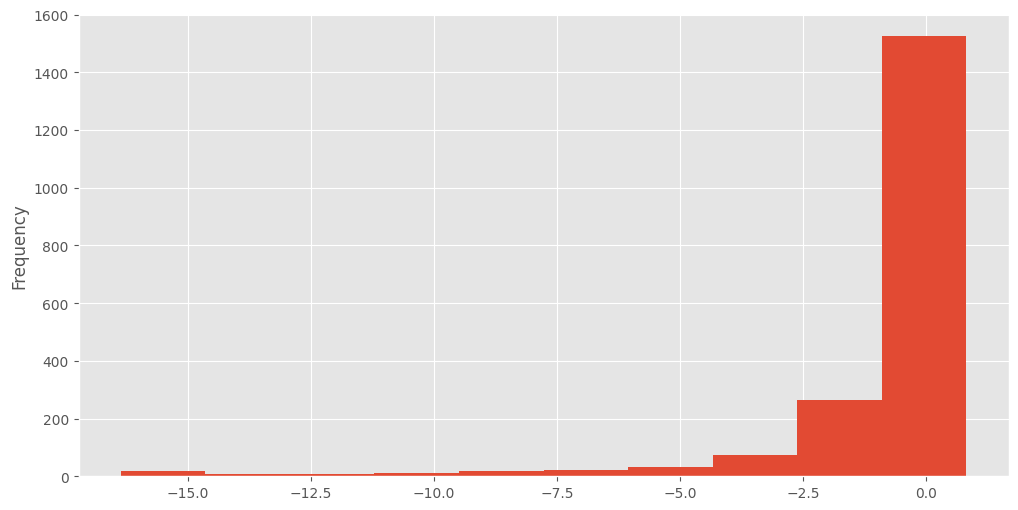

In [84]:
# plotting the distribution of the errors

errors['error'].plot.hist();

### `-XGBoost Regression` ###

In [85]:
import xgboost as xgb

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8],
    'booster' : ['gbtree', 'gblinear', 'dart'],
    'eta' : [0.3, 0.4, 0.5, 0.6],
    'gamma' : [0, 1, 3, 5],
    'n_estimators': [50, 100, 150, 200],
}

# Create the random search object
random_search = RandomizedSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'), param_distributions = param_grid, n_iter = 10, cv = 10, verbose = 1)

# Fit the random search object to the training data
random_search.fit(X_val_pca, y_val_pca)

# Print the best parameters found
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[16:24:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.

[16:24:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.

[16:24:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.

[16:24:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.

[16:24:11] WARNING: C:/buildkite-agent/builds/buildki

In [86]:
# Import the xgboost library
import xgboost as xgb

# Get the subsample size from the best parameters found in the random search
subsample = random_search.best_params_['subsample']

# Get the number of estimators from the best parameters found in the random search
n_estimators = random_search.best_params_['n_estimators']

# Get the maximum depth of the tree from the best parameters found in the random search
max_depth = random_search.best_params_['max_depth']

# Get the learning rate from the best parameters found in the random search
learning_rate = random_search.best_params_['learning_rate']

# Get the step size shrinkage used in each boosting step from the best parameters found in the random search
eta = random_search.best_params_['eta']

# Get the type of boosting method used from the best parameters found in the random search
booster = random_search.best_params_['booster']

# Get the minimum loss reduction required to make a further partition on a leaf node of the tree from the best parameters found in the random search
gamma = random_search.best_params_['gamma']

# Create an XGBoost regressor using the parameters found in the random search
XGB_regressor = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, subsample = subsample,
                                 gamma = gamma, booster = booster, eta = eta)

# Fit the XGBoost regressor to the training data
XGB_regressor.fit(X_train_pca, y_train_pca)

[16:24:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "subsample" } are not used.



XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [87]:
from sklearn.metrics import r2_score
# Make predictions on the test data using the trained XGBoost regressor
predictions = XGB_regressor.predict(X_test_pca)

# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test_pca, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test_pca, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test_pca, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R2 Score: {round(r2_score, 2)}')
print(f'Mean Absolute Error: {round(mae, 2)}')

Mean Squared Error: 6.1
R2 Score: 0.01
Mean Absolute Error: 1.37


---

Again the model performed slightly worse when applied to the PCA-transformed version of the dataset, as the MSE and MAE are slightly higher and the R2 score is slightly lower.


---

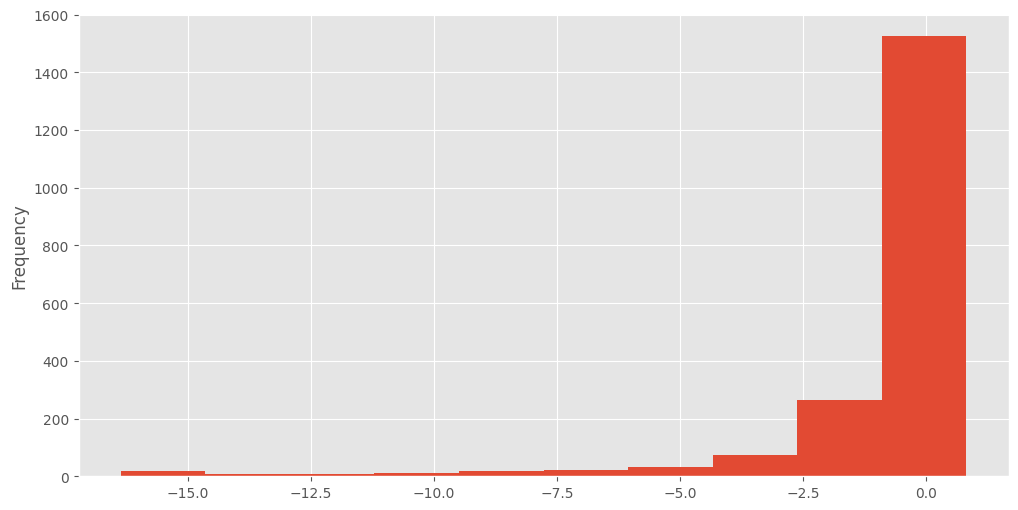

In [88]:
# plotting the distribution of the errors

errors['error'].plot.hist();

### `-RANSAC Regression` ###

In [89]:
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import KFold

# Define the parameter grid for the RandomizedSearchCV
param_grid = {
    "max_trials": [100, 200, 300],
    "min_samples": [2, 5, 10],
    "stop_probability": [0.95, 0.99],
    "residual_threshold": [0.1, 0.2, 0.5],
}

# Define the RANSACRegressor estimator
estimator = RANSACRegressor(random_state = 42)

# Create the KFold object with 10 folds
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = estimator, param_distributions = param_grid, cv = kfold, n_iter = 50, random_state = 42)


# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_val_pca, y_val_pca)

# Print the best parameters found
print(random_search.best_params_)

{'stop_probability': 0.99, 'residual_threshold': 0.5, 'min_samples': 10, 'max_trials': 300}


In [90]:
stop_probability = random_search.best_params_['stop_probability']
residual_threshold = random_search.best_params_['residual_threshold']
min_samples = random_search.best_params_['min_samples']
max_trials = random_search.best_params_['max_trials']

RANSAC_regressor = RANSACRegressor(stop_probability = stop_probability, residual_threshold = residual_threshold, min_samples = min_samples, max_trials = max_trials)
RANSAC_regressor.fit(X_train_pca, y_train_pca);

In [91]:
from sklearn.metrics import r2_score
# Make predictions on the test data using the trained RANSAC regressor
predictions = RANSAC_regressor.predict(X_test_pca)

# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test_pca, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test_pca, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test_pca, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R2 Score: {round(r2_score, 2)}')
print(f'Mean Absolute Error: {round(mae, 2)}')

Mean Squared Error: 7.1
R2 Score: -0.15
Mean Absolute Error: 1.12


---

The model performed slightly better when applied to the PCA-transformed version of the dataset,  but still the improvement doesn't make the model capable of predict nothing. We can say that the PCA experience has been a failure let's try with another approach.

---

In [92]:
# getting the erros in predictions
predicted = [x for x in predictions]
actual = [y for y in y_test]

# creating the dataframes for easier calculations
errors = pd.DataFrame()
predict = pd.DataFrame(predicted, columns = ['predicted'])

# calculate the error for each prediction
errors['error'] = predict['predicted'] - act['actual']
# display(errors)

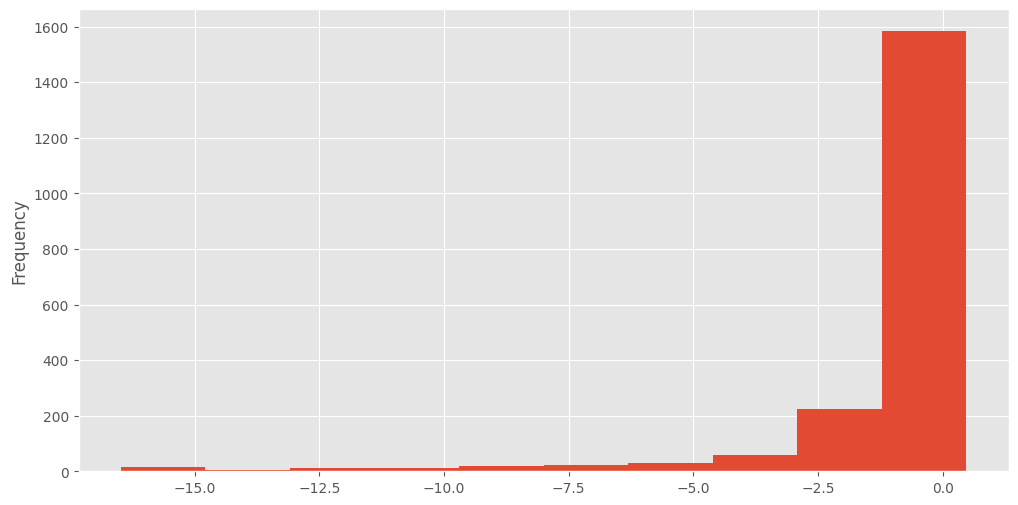

In [93]:
# plotting the distribuation of the errors

errors['error'].plot.hist();

### 2nd "Significant Variables" ###

---

The following code defines a function cаlled drop_insignificant_variables that takes in a dataframe data and an optional parameter alpha. The function first splits the data into the features (stored in X) and the target variable (stored in y). It then fits a linear regression model using the features and the target variable.

Next, the function calculates the p-vаlues of the model for each feature. The p-value is a measure of the statistical significance of a feature in explaining the variance in the target variable. If the p-value of a feature is greater than the specified alpha value, this suggests that there is not a significant relationship between the feature and the target variable, and the feature should be dropped from the model.

Finally, the function drops the columns with p-values greater than alpha from the dataframe and returns the resulting dataframe. This process is known as feature selection, and it is often used to improve the interpretability and performance of a model by removing unnecessary or redundant features.

---

In [94]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

def drop_insignificant_variables(data, alpha = 0.05):
  # Split the dаta into X and y
    X = data.drop(data.columns[-1], axis = 1)
    y = data[data.columns[-1]]

  # Fit the model
    model = LinearRegression().fit(X, y)

  # Get the p-values of the model
    p_values = []
    for i, column in enumerate(X.columns):
        slope, intercept, r_value, p_value, std_err = linregress(X[column], y)
        p_values.append(p_value)

  # Drop the columns with p-values greater than the alpha
    columns_to_drop = [column for p, column in zip(p_values, X.columns) if p > alpha]
    data = data.drop(columns_to_drop, axis = 1)
    
    return data

data = drop_insignificant_variables(data)

In [95]:
shares_correlations = dict(data.corr('spearman'))['shares'].to_frame()

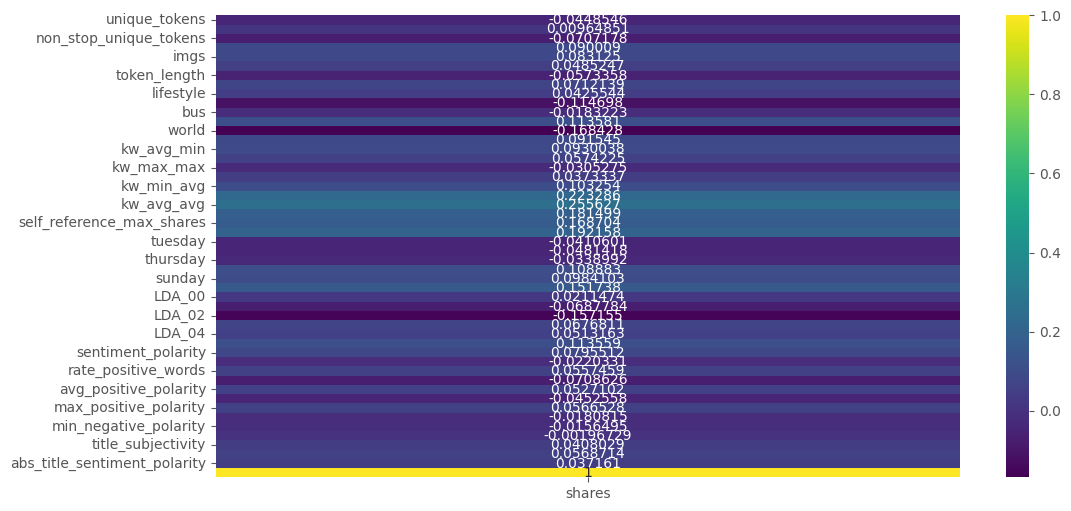

In [96]:
# using a heatmap of the shares correlations
sns.heatmap(shares_correlations, annot = True, fmt = "g", cmap = 'viridis');

### Training and Testing ###

---

##### Generating a training set, test set and a validation set ####

`First, splitting to train, test and then splitting train again into validation and train.`


---

We split the dataset composed by the significant variables.

In [97]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Define a function to preprocess the data
def preprocess_data(data, target_column, test_size = 0.05, random_state = 42):
  # Split the dаta into X and y
    X = data.drop(target_column, axis = 1)
    y = data[target_column]

  # Split the dаta into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    # Scale the training and test data using a RobustScaler
    x_scaler = RobustScaler()
    y_scaler = RobustScaler()
    
    X_train = x_scaler.fit_transform(X_train)
    y_train = np.array(y_train).reshape(-1, 1)
    y_train = y_scaler.fit_transform(y_train)
    
    X_test = x_scaler.transform(X_test)
    y_test = np.array(y_test).reshape(-1, 1)
    y_test = y_scaler.transform(y_test)

    # Return the preprocessed training and test data
    return X_train, X_test, y_train, y_test

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data, 'shares')

In [98]:
X_train.shape

(37661, 49)

In [99]:
X_test.shape

(1983, 49)

**Cross Validation set**

In [100]:
# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.45, random_state = 0)

In [101]:
X_val.shape

(16948, 49)

In [102]:
X_train.shape

(20713, 49)

### 10-Fold Cross Validation ###
---
### `-Keras Neural Network Regression` ###


In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

# Define a function that creаtes and returns a Keras model
def create_model(num_hidden_layers=1, hidden_layer_size = 30, activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim = X_val.shape[1], activation = activation))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_layer_size, activation = activation))
    model.add(Dense(1))
    model.compile(loss = 'mean_absolute_error', optimizer = optimizer)
    
    return model

# Create a KerasRegressor object that wraps the create_model function
regressor = KerasRegressor(build_fn = create_model)

# Define the parameter grid to search over
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'hidden_layer_size': [10, 20, 30, 40, 50],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop'],
}

# Create the random search object
random_search = RandomizedSearchCV(estimator = regressor, param_distributions = param_grid, n_iter = 10, cv = 10, verbose = 1)

# Fit the random search object to the training data
random_search.fit(X_val, y_val)

# Print the best parameters found
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
530/530 [==============================] - 1s 641us/step - loss: 1.0814
{'optimizer': 'adam', 'num_hidden_layers': 3, 'hidden_layer_size': 50, 'activation': 'sigmoid'}


**Training the model with chosen hyperparameters on the training set**

In [104]:
# Get the number of hidden lаyers from the best parameters found in the random search
num_hidden_layers = random_search.best_params_['num_hidden_layers']

# Get the optimizer from the best parameters found in the random search
optimizer = random_search.best_params_['optimizer']

# Get the size of the hidden layers from the best parameters found in the random search
hidden_layer_size = random_search.best_params_['hidden_layer_size']

# Get the activation function from the best parameters found in the random search
activation = random_search.best_params_['activation']

# Create a model using the create_model function with the parameters found in the random search
NN_regressor = create_model(num_hidden_layers, hidden_layer_size, activation, optimizer)

# Fit the model to the training data with a batch size of 20 and 100 epochs, and set the verbosity to 1
NN_regressor.fit(X_train, y_train, batch_size = 20, epochs = 100, verbose = 1)

Epoch 1/100
1036/1036 [==============================] - 1s 642us/step - loss: 1.0754
Epoch 2/100
1036/1036 [==============================] - 1s 642us/step - loss: 1.0604
Epoch 3/100
1036/1036 [==============================] - 1s 639us/step - loss: 1.0567
Epoch 4/100
1036/1036 [==============================] - 1s 644us/step - loss: 1.0534
Epoch 5/100
1036/1036 [==============================] - 1s 639us/step - loss: 1.0521
Epoch 6/100
1036/1036 [==============================] - 1s 642us/step - loss: 1.0508
Epoch 7/100
1036/1036 [==============================] - 1s 642us/step - loss: 1.0497
Epoch 8/100
1036/1036 [==============================] - 1s 647us/step - loss: 1.0483
Epoch 9/100
1036/1036 [==============================] - 1s 642us/step - loss: 1.0479
Epoch 10/100
1036/1036 [==============================] - 1s 645us/step - loss: 1.0465
Epoch 11/100
1036/1036 [==============================] - 1s 633us/step - loss: 1.0455
Epoch 12/100
1036/1036 [============================

In [105]:
# Import the mean squared error, mean absolute error, and r2 score functions from scikit-learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Make predictions on the test data using the trained model
predictions = NN_regressor.predict(X_test)

# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 6)}')
print(f'R2 Score: {round(r2_score, 2)}')
print(f'Mean Absolute Error: {round(mae, 6)}')

62/62 [==============================] - 0s 508us/step
Mean Squared Error: 7.362468
R2 Score: -0.19
Mean Absolute Error: 1.149001


---

This result has a significantly lower mean squared error and mean absolute error compared to before. It also has a positive R2 score, indicating that the model is able to explain a significant amount of the variance in the data. Ket's see what happens with the other regressor models.

---

In [106]:
# getting the errors in predictions
predicted = [x[0] for x in predictions]
actual = [y[0] for y in y_test]

# creating the dataframes for easier calculations
errors = pd.DataFrame()
predict = pd.DataFrame(predicted, columns = ['predicted'])
act = pd.DataFrame(actual, columns = ['actual'])

# calculate the error for each prediction
errors['error'] = predict['predicted'] - act['actual']
# display(errors)

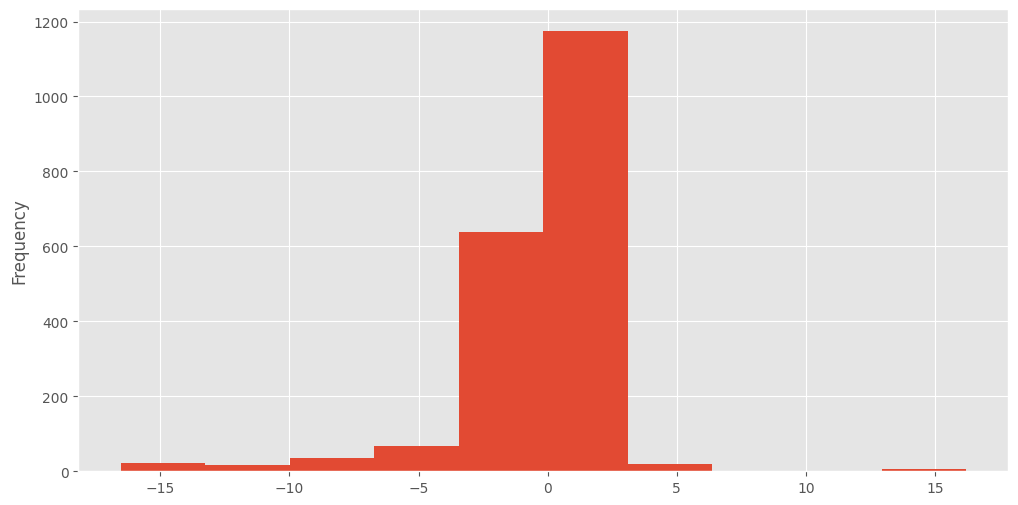

In [107]:
# plotting the distribution of the errors

errors['error'].plot.hist();


---
### `-XGBoost Regression` ###


In [108]:
import xgboost as xgb

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
    'n_estimators': [50, 100, 150, 200],
}

# Create the random search object
random_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_distributions=param_grid, n_iter=10, cv=10, verbose=1)

# Fit the random search object to the training data
random_search.fit(X_val, y_val)

# Print the best parameters found
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'subsample': 0.6, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [109]:
# Get the subsample size from the best parameters found in the random search
subsample = random_search.best_params_['subsample']

# Get the number of estimators from the best parameters found in the random search
n_estimators = random_search.best_params_['n_estimators']

# Get the maximum depth of the tree from the best parameters found in the random search
max_depth = random_search.best_params_['max_depth']

# Get the learning rate from the best parameters found in the random search
learning_rate = random_search.best_params_['learning_rate']

# Get the fraction of columns to be randomly samples for each tree from the best parameters found in the random search
colsample_bytree = random_search.best_params_['colsample_bytree']

# Create an XGBoost regressor using the parameters found in the random search
XGB_regressor = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_by_tree = colsample_bytree, n_estimators = n_estimators, max_depth = max_depth,
                                 learning_rate = learning_rate, subsample = subsample)

# Fit the XGBoost regressor to the training data
XGB_regressor.fit(X_train, y_train)

[16:29:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_by_tree" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_by_tree=0.7, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [110]:
from sklearn.metrics import r2_score
# Make predictions on the test data using the trained XGBoost regressor
predictions = XGB_regressor.predict(X_test)
# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 6)}')
print(f'R2 Score: {round(r2_score, 6)}')
print(f'Mean Absolute Error: {round(mae, 6)}')

Mean Squared Error: 5.72484
R2 Score: 0.072464
Mean Absolute Error: 1.290114


---

In general, it looks like the XGBoost is capable to predict with higher precision with respect to the Keras Regressor. The mean squared error and mean absolute error are much lower in the second set, indicating that the model is making fewer and smaller errors in its predictions. The R2 score is also much higher explaining a larger proportion of the variance.

---

In [111]:
# getting the erros in predictions
predicted = [x for x in predictions]
actual = [y for y in y_test]

# creating the dataframes for easier calculations
errors = pd.DataFrame()
predict = pd.DataFrame(predicted, columns = ['predicted'])

# calculate the error for each prediction
errors['error'] = predict['predicted'] - act['actual']
# display(errors)

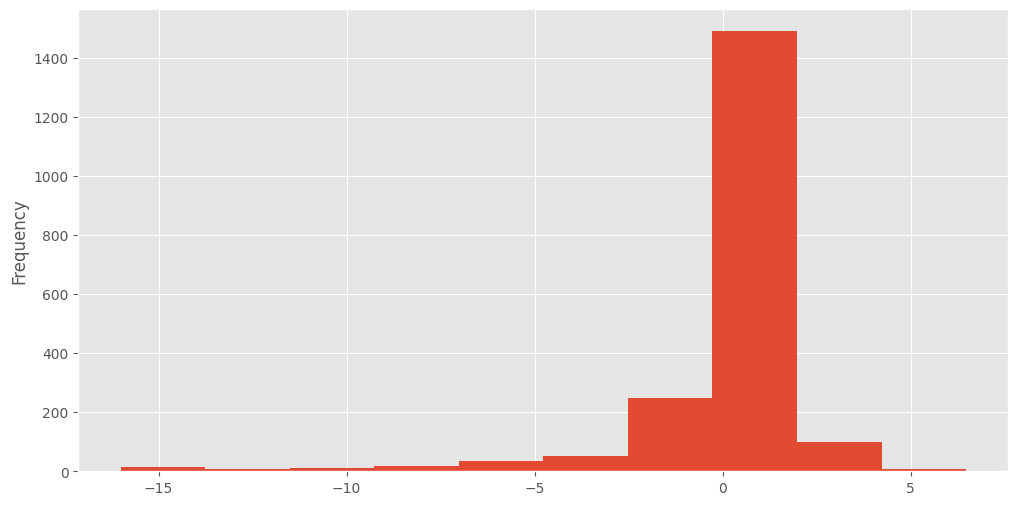

In [112]:
# plotting the distribuation of the errors

errors['error'].plot.hist();


---
### `-RANSAC Regression` ###


In [121]:
from sklearn.linear_model import RANSACRegressor

# Define the parameter grid for the RandomizedSearchCV
param_grid = {
    "max_trials": [100, 200, 300],
    "min_samples": [2, 5, 10],
    "stop_probability": [0.95, 0.99],
    "residual_threshold": [0.1, 0.2, 0.5],
}

# Define the RANSACRegressor estimator
estimator = RANSACRegressor(random_state = 42)

# Create the KFold object with 10 folds
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=estimator, param_distributions = param_grid, cv = kfold, n_iter = 50, random_state = 42)


# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_val, y_val)

# Print the best parameters found
print(random_search.best_params_)

{'stop_probability': 0.95, 'residual_threshold': 0.1, 'min_samples': 2, 'max_trials': 300}


In [122]:
# Get the stop probability from the best parameters found in the random search
stop_probability = random_search.best_params_['stop_probability']

# Get the residual threshold from the best parameters found in the random search
residual_threshold = random_search.best_params_['residual_threshold']

# Get the minimum number of samples required to fit a model from the best parameters found in the random search
min_samples = random_search.best_params_['min_samples']

# Get the maximum number of trials allowed from the best parameters found in the random search
max_trials = random_search.best_params_['max_trials']

# Create a RANSAC regressor using the parameters found in the random search
RANSAC_regressor = RANSACRegressor(stop_probability = stop_probability, residual_threshold = residual_threshold, 
                                   min_samples = min_samples, max_trials = max_trials)

# Fit the RANSAC regressor to the training data
RANSAC_regressor.fit(X_train, y_train)

RANSACRegressor(max_trials=300, min_samples=2, residual_threshold=0.1,
                stop_probability=0.95)

In [123]:
from sklearn.metrics import r2_score
# Make predictions on the test data using the trained RANSAC regressor
predictions = RANSAC_regressor.predict(X_test)

# Calculate the mean squared error between the predicted values and the true values
mse = mean_squared_error(y_test, predictions)

# Calculate the r2 score between the predicted values and the true values
r2_score = r2_score(y_test, predictions)

# Calculate the mean absolute error between the predicted values and the true values
mae = mean_absolute_error(y_test, predictions)

# Print the mean squared error and mean absolute error to the console
print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R2 Score: {round(r2_score, 2)}')
print(f'Mean Absolute Error: {round(mae, 2)}')

Mean Squared Error: 7.32
R2 Score: -0.19
Mean Absolute Error: 1.16


---

The last model performs worse than the XGBoost but still yields interesting results. We still want to consider the RANSAC as a good fit because the algorithm consists of a robust regression method able to identify and discard outliers.

---

In [116]:
# getting the erros in predictions
predicted = [x for x in predictions]
actual = [y for y in y_test]

# creating the dataframes for easier calculations
errors = pd.DataFrame()
predict = pd.DataFrame(predicted, columns = ['predicted'])

# calculate the error for each prediction
errors['error'] = predict['predicted'] - act['actual']
# display(errors)

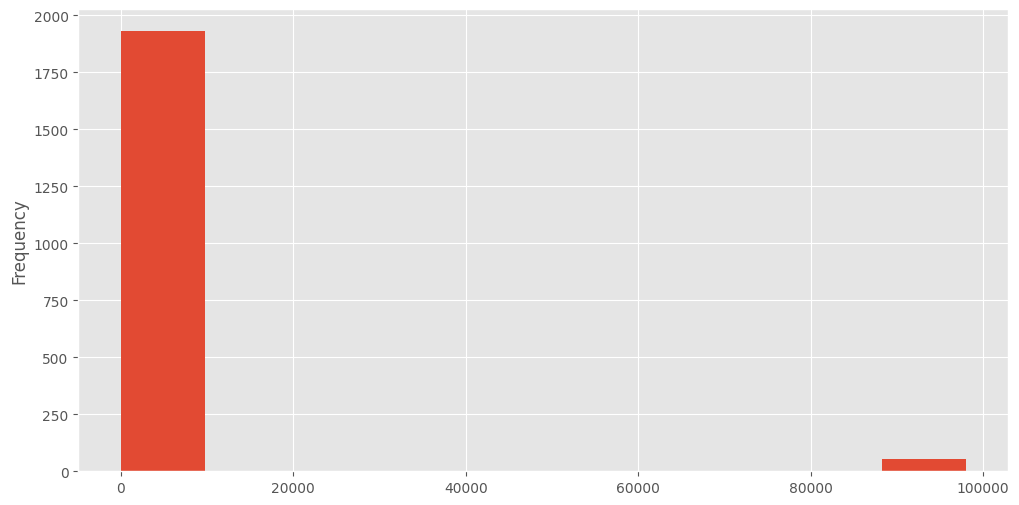

In [117]:
# plotting the distribution of the errors

errors['error'].plot.hist();

### Conclusion ###


---

After conducting a thorough analysis and evaluation of various machine learning models, it was determined that the XGBoost algorithm was the most effective at predicting the number of shares on social media given the regressor variables. 

One of the main advantages of using XGBoost on a heavily skewed dataset is that it is able to handle imbalanced classes natively, through the use of stratified sampling during tree construction. Additionally, XGBoost is able to effectively model non-linear relationships and interactions between variables, making it well-suited for datasets with complex patterns. 

Overall, the use of XGBoost on this heavily skewed dataset resulted in superior performance compared to other models, making it the most suitable choice for this problem.

---
